In [1]:
import time
import requests
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


C:\Users\User\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
df = pd.read_csv("C:/Users/User/Downloads/metro_traffic_15_19.csv")

In [3]:
df

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936
...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543
32043,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781
32044,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159
32045,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450


In [4]:
df.dtypes

date_time          object
rain_1h           float64
snow_1h           float64
temp              float64
clouds_all          int64
traffic_volume      int64
dtype: object

In [5]:
df.date_time = pd.to_datetime(df.date_time)

In [6]:
df.head(2)

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.2,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.4,1,444


In [7]:
df.dtypes

date_time         datetime64[ns]
rain_1h                  float64
snow_1h                  float64
temp                     float64
clouds_all                 int64
traffic_volume             int64
dtype: object

#### Basic evaluation of features

In [8]:
df.date_time.value_counts()

2018-04-13 21:00:00    5
2015-07-06 13:00:00    5
2016-11-18 14:00:00    5
2018-09-20 18:00:00    5
2018-04-14 09:00:00    5
                      ..
2016-10-13 04:00:00    1
2016-10-13 03:00:00    1
2016-10-13 02:00:00    1
2016-10-13 01:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 26528, dtype: int64

In [9]:
df.rain_1h.value_counts()

0.00     30170
0.25       449
0.51       140
1.02        87
0.30        83
         ...  
7.70         1
16.51        1
4.05         1
3.80         1
5.06         1
Name: rain_1h, Length: 221, dtype: int64

In [10]:
df.snow_1h.value_counts()

0.00    31984
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17        3
0.44        2
0.08        2
0.21        1
Name: snow_1h, dtype: int64

In [11]:
df.temp.value_counts()

274.15    104
275.15     80
274.08     78
291.15     63
271.15     60
         ... 
253.84      1
253.42      1
252.53      1
250.88      1
283.03      1
Name: temp, Length: 4908, dtype: int64

In [12]:
df.clouds_all.value_counts()

90     11301
1       9764
75      3642
40      3034
5       1045
20      1017
0        943
92       288
8        131
12       122
80        86
36        79
32        78
56        76
24        75
68        73
88        68
48        66
64        54
76        49
44        35
100       21
Name: clouds_all, dtype: int64

In [13]:
df.traffic_volume.value_counts()

356     39
353     36
351     33
337     31
358     31
        ..
2553     1
1401     1
2430     1
1754     1
1359     1
Name: traffic_volume, Length: 6389, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32047 entries, 0 to 32046
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       32047 non-null  datetime64[ns]
 1   rain_1h         32047 non-null  float64       
 2   snow_1h         32047 non-null  float64       
 3   temp            32047 non-null  float64       
 4   clouds_all      32047 non-null  int64         
 5   traffic_volume  32047 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.5 MB


In [15]:
df.describe()

,rain_1h,snow_1h,temp,clouds_all,traffic_volume
count,32047.000000,32047.000000,32047.000000,32047.000000,32047.000000
mean,0.419653,0.000335,282.892641,47.403782,3258.209910
std,54.924907,0.010015,12.123625,39.730094,1974.058455
min,0.000000,0.000000,243.390000,0.000000,0.000000
25%,0.000000,0.000000,273.880000,1.000000,1196.000000
50%,0.000000,0.000000,285.080000,40.000000,3412.000000
75%,0.000000,0.000000,292.700000,90.000000,4912.000000
max,9831.300000,0.510000,310.070000,100.000000,7280.000000


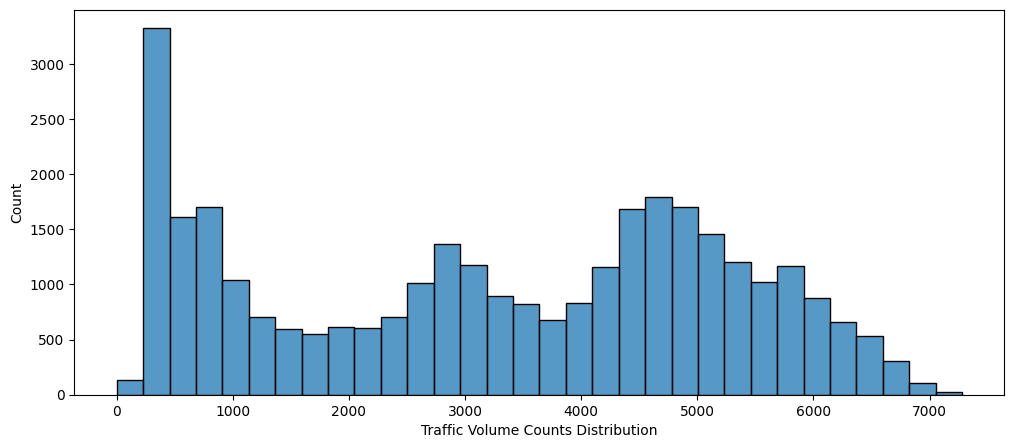

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(df['traffic_volume'],kde = False)
plt.xlabel('Traffic Volume Counts Distribution')

plt.show()

In [17]:
df.describe().rain_1h

count    32047.000000
mean         0.419653
std         54.924907
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_1h, dtype: float64

In [18]:
df.rain_1h.max()

9831.3

In [19]:
df.rain_1h.min()

0.0

<AxesSubplot: >

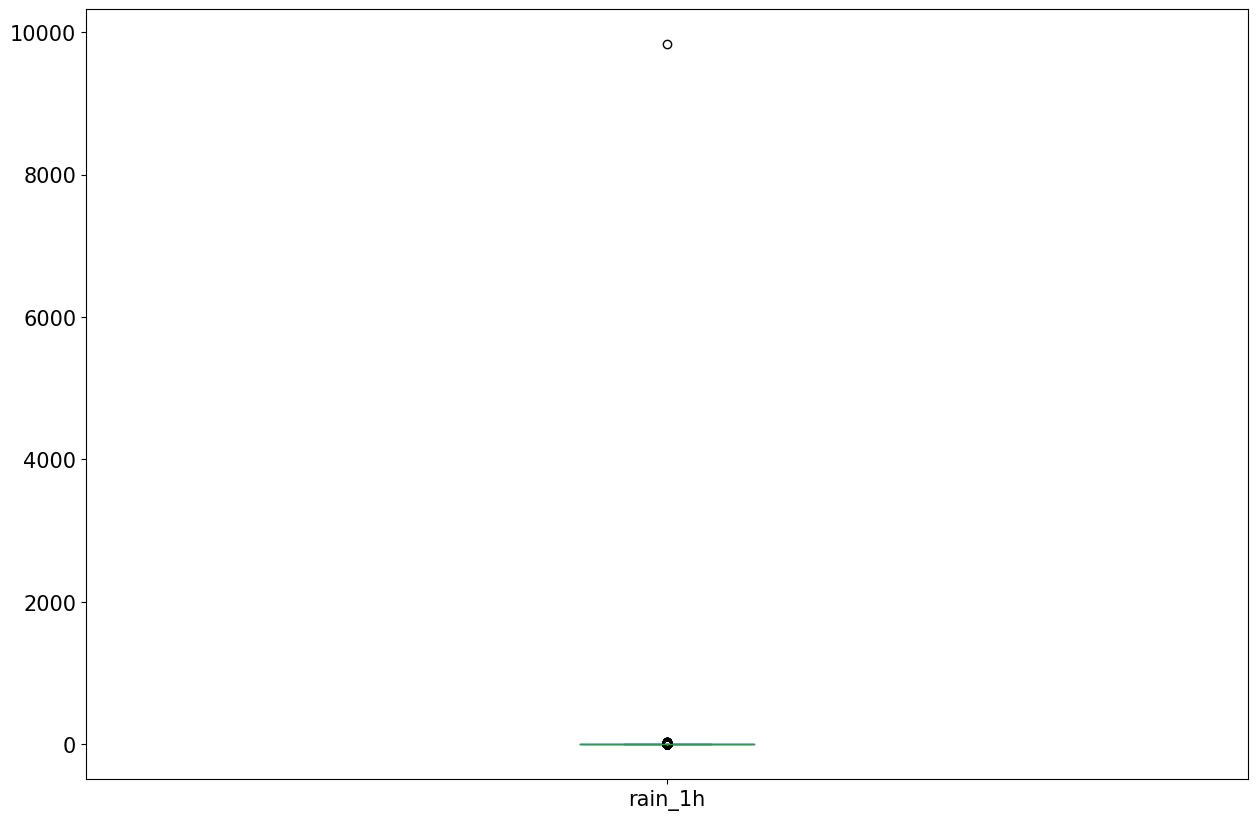

In [20]:
df.rain_1h.plot(kind='box', figsize=(15, 10))


- rain fall outlier is clearly wrong because it would massively exceed the record amount for rainfall in the span of an hour.

In [21]:
df.loc[df.rain_1h == 9831.3]

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
8715,2016-07-11 17:00:00,9831.3,0.0,302.11,75,5535


In [22]:
df.iloc[[8712, 8713, 8714, 8715, 8716, 8717, 8718]]

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
8712,2016-07-11 14:00:00,0.0,0.0,300.18,90,4456
8713,2016-07-11 15:00:00,0.0,0.0,300.81,75,4858
8714,2016-07-11 16:00:00,0.0,0.0,301.48,75,5934
8715,2016-07-11 17:00:00,9831.3,0.0,302.11,75,5535
8716,2016-07-11 18:00:00,0.0,0.0,302.54,75,3900
8717,2016-07-11 19:00:00,0.0,0.0,302.39,75,2856
8718,2016-07-11 20:00:00,0.0,0.0,302.45,75,2506


In [23]:
check = (df['date_time'] > "2016-07-11 01:00:00") & (df['date_time'] <= "2016-07-11 23:00:00")
df.loc[check]

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
8700,2016-07-11 02:00:00,0.00,0.0,295.62,90,291
8701,2016-07-11 03:00:00,0.00,0.0,295.24,75,342
8702,2016-07-11 04:00:00,0.00,0.0,295.40,75,848
8703,2016-07-11 05:00:00,0.00,0.0,295.37,75,2780
8704,2016-07-11 06:00:00,0.00,0.0,295.05,90,5211
8705,2016-07-11 07:00:00,0.00,0.0,294.99,75,5803
8706,2016-07-11 08:00:00,0.00,0.0,294.83,90,5157
8707,2016-07-11 09:00:00,0.00,0.0,294.79,90,4016
8708,2016-07-11 10:00:00,0.00,0.0,295.13,90,3891
8709,2016-07-11 11:00:00,0.00,0.0,296.45,90,3998


- all of the closest hours were zero so and only one hour that day had any rain at all, which was pretty minimal and not even 1mm so makes sense to assume it was 0MM instead of dropping the row as other columnns all look correct.
- if it turns out later that there is a very high correlation between rain and traffic then it would make sense to drop the row.

In [24]:
df.loc[df.rain_1h == 9831.3, 'rain_1h'] = 0
df.iloc[[8712, 8713, 8714, 8715, 8716, 8717, 8718]]

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
8712,2016-07-11 14:00:00,0.0,0.0,300.18,90,4456
8713,2016-07-11 15:00:00,0.0,0.0,300.81,75,4858
8714,2016-07-11 16:00:00,0.0,0.0,301.48,75,5934
8715,2016-07-11 17:00:00,0.0,0.0,302.11,75,5535
8716,2016-07-11 18:00:00,0.0,0.0,302.54,75,3900
8717,2016-07-11 19:00:00,0.0,0.0,302.39,75,2856
8718,2016-07-11 20:00:00,0.0,0.0,302.45,75,2506


In [25]:
#df = df[df.rain_1h < 9831]

<AxesSubplot: >

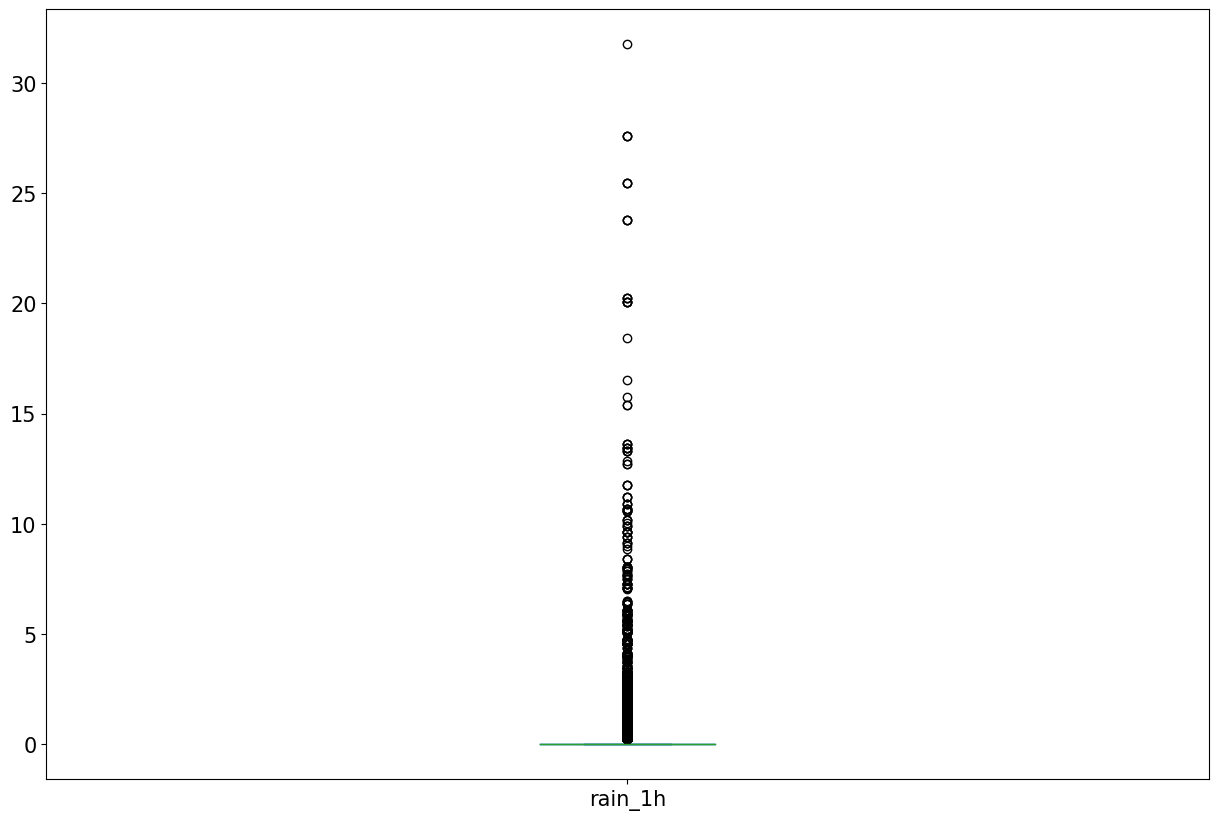

In [26]:
df.rain_1h.plot(kind='box', figsize=(15, 10))

<AxesSubplot: >

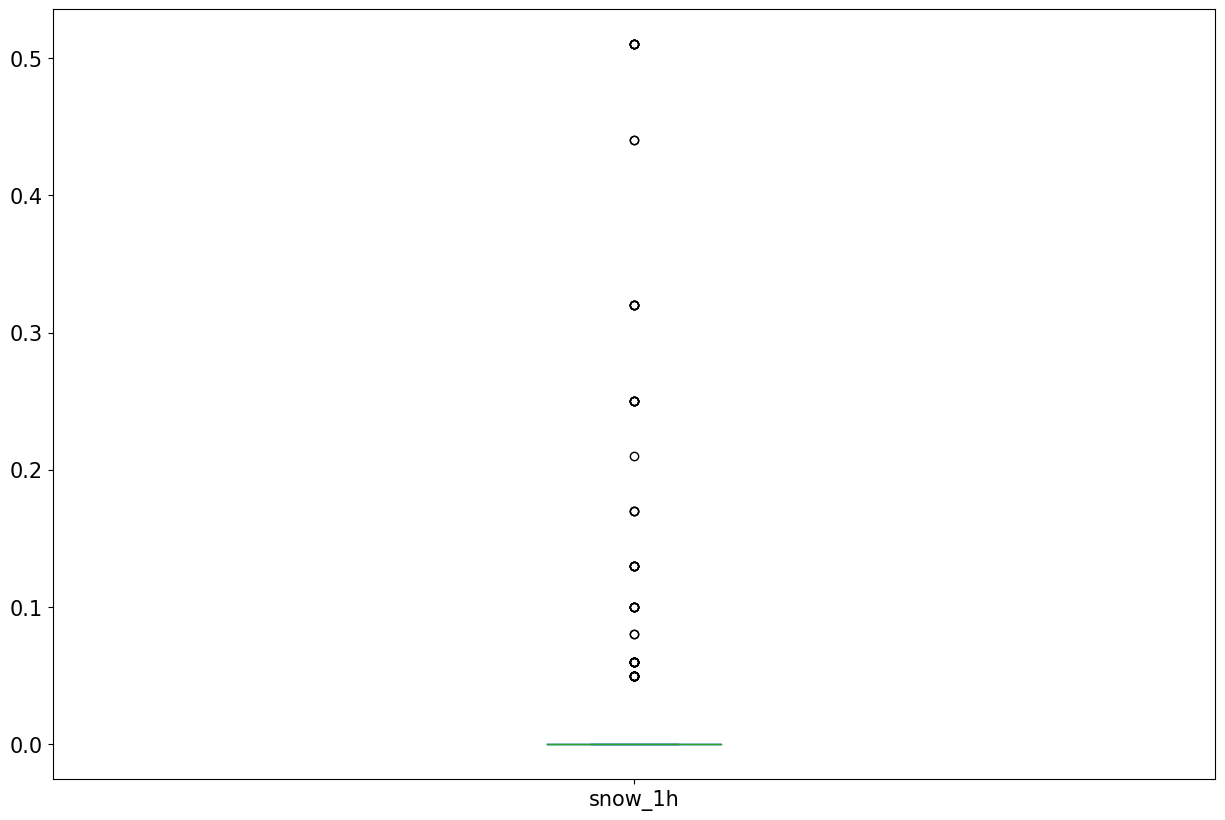

In [27]:
df.snow_1h.plot(kind='box', figsize=(15, 10))

<AxesSubplot: >

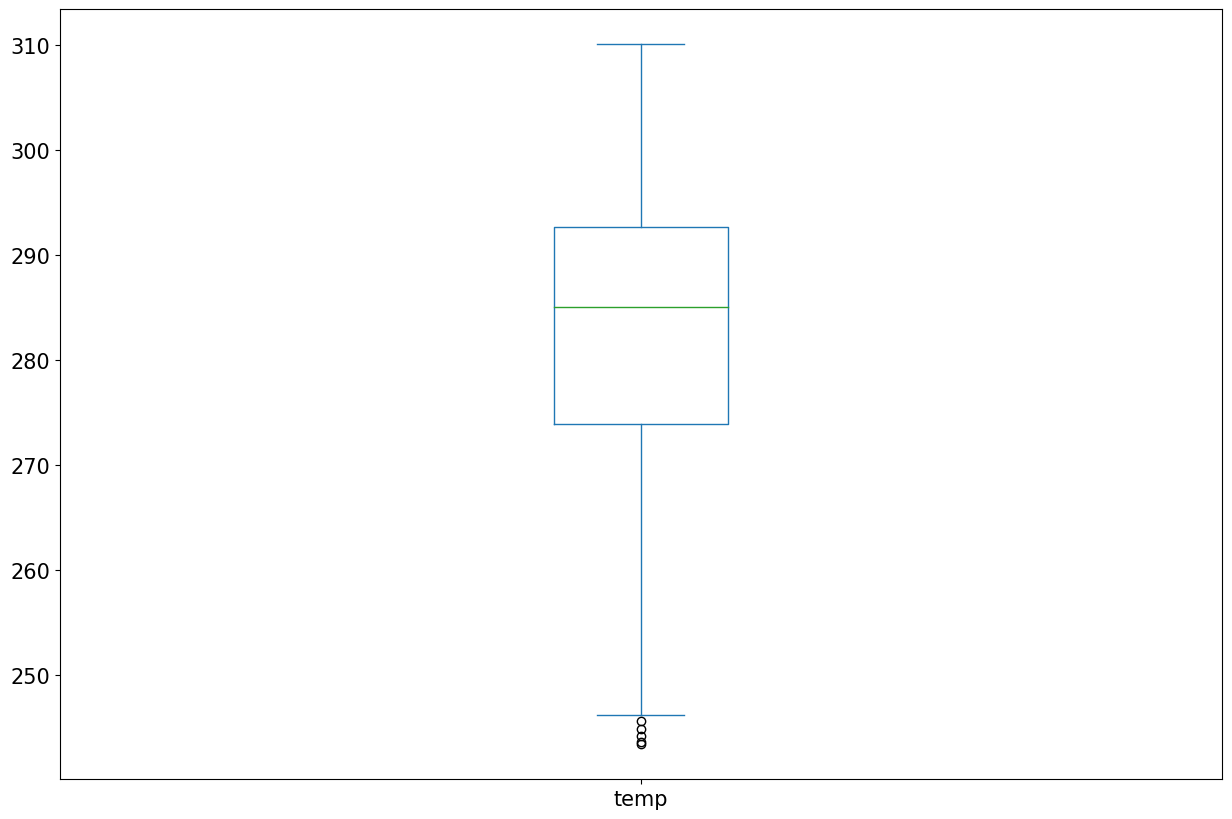

In [28]:
df.temp.plot(kind='box', figsize=(15, 10))

- dropping duplicates

In [29]:
df.duplicated().sum()

5464

In [30]:
df[df.duplicated(keep=False)]

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
72,2015-07-04 01:00:00,0.0,0.0,290.88,1,851
73,2015-07-04 01:00:00,0.0,0.0,290.88,1,851
74,2015-07-04 02:00:00,0.0,0.0,290.70,1,735
75,2015-07-04 02:00:00,0.0,0.0,290.70,1,735
76,2015-07-04 02:00:00,0.0,0.0,290.70,1,735
...,...,...,...,...,...,...
32016,2018-09-29 19:00:00,0.0,0.0,280.68,90,3818
32035,2018-09-30 14:00:00,0.0,0.0,283.48,90,4380
32036,2018-09-30 14:00:00,0.0,0.0,283.48,90,4380
32037,2018-09-30 15:00:00,0.0,0.0,283.84,75,4302


In [31]:
df = df.drop_duplicates()

In [32]:
df

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936
...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543
32043,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781
32044,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159
32045,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450


In [33]:
df = df.reset_index(drop=True)

In [34]:
df

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936
...,...,...,...,...,...,...
26578,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543
26579,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781
26580,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159
26581,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450


- Brief examination of the traffic volume mean and median (50:50 split would mean they are the same)

In [35]:
df.describe().traffic_volume

count    26583.000000
mean      3295.834405
std       1968.958462
min          0.000000
25%       1263.000000
50%       3471.000000
75%       4931.000000
max       7280.000000
Name: traffic_volume, dtype: float64

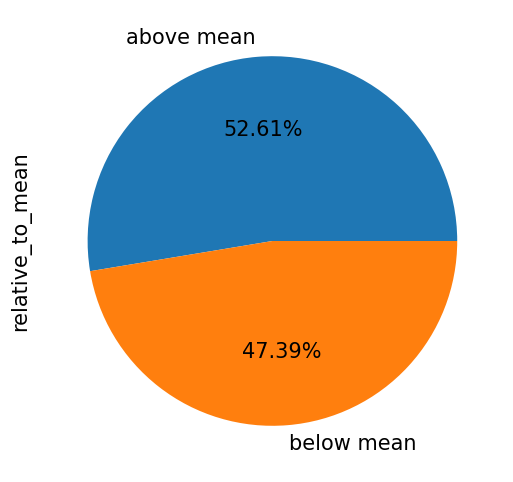

In [36]:
df["relative_to_mean"] = "below mean"
df.loc[df.traffic_volume > 3258.209910, 'relative_to_mean'] = "above mean"

counts = df['relative_to_mean'].value_counts()
counts.plot.pie(autopct='%.2f%%', figsize=(6, 6))
df = df.drop("relative_to_mean", axis=1)

###  Time-series as given

- initial plot just seeing if over the entire time span there is noticeable change.
- plot is unsurprisngly not easy to read due to its density but there actually is a noticeable inconsistency and cycle to the max measurements of traffic volume suggeting there is some seasonality.
- also appears to be some variance by the year which may be worth evaluating better at a later stage.

<AxesSubplot: xlabel='date_time'>

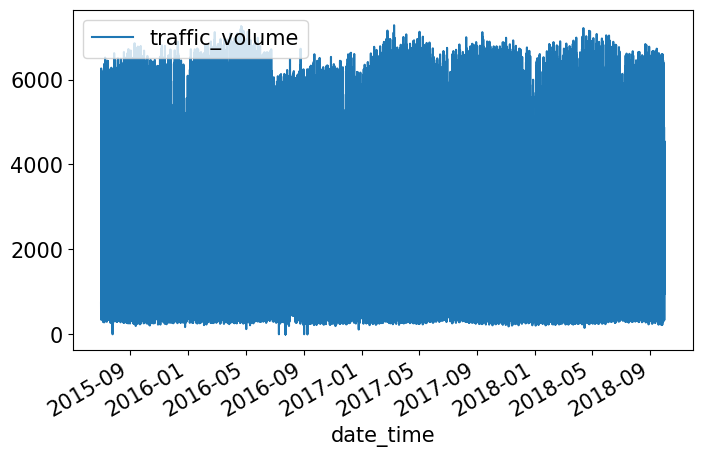

In [37]:
df.plot.line(x="date_time", y="traffic_volume", figsize=(8,5))


- This scatter splot gives a better view of the distribution of traffic over the time period.
- There are three noticeable areas of higher density around 5000, 3000, and below 1000.
- The densities appear to curve with the max values which corroborates the suspicion drawn from the previous graph that there is a cyclical nature to the traffic volume.
- There is an unusual lack of density around the 3000 mark for the area arond the year 2016


Text(0.5, 1.0, 'Scatter Plot of Traffic Volume')

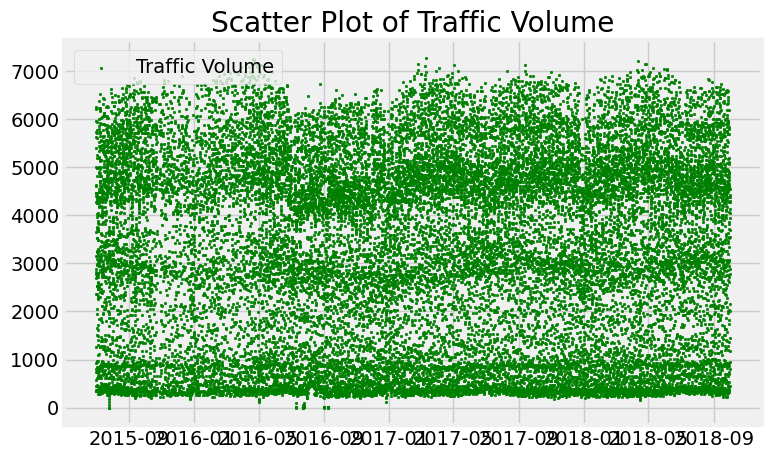

In [38]:
x = df.date_time
y = df.traffic_volume

plt.figure(figsize=(9, 5))
plt.style.use('fivethirtyeight')
  
plt.scatter(x, y, color = "green", s = 3, label = 'Traffic Volume')

plt.legend(loc = 'upper left')
plt.title("Scatter Plot of Traffic Volume")
 

In [39]:
# just quick evaluation to show min and max date
print(df.date_time.max())
print(df.date_time.min())

2018-09-30 23:00:00
2015-07-01 00:00:00


### Time-series as years

- This graph looks at the mean values by year showing that there is a clear variance.
- The graph is not continuously inceasing which would make it unlikely to be helpful in a linear regression model.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\999411635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["date_time"] = df.date_time.dt.year


Text(0.5, 0, 'Year')

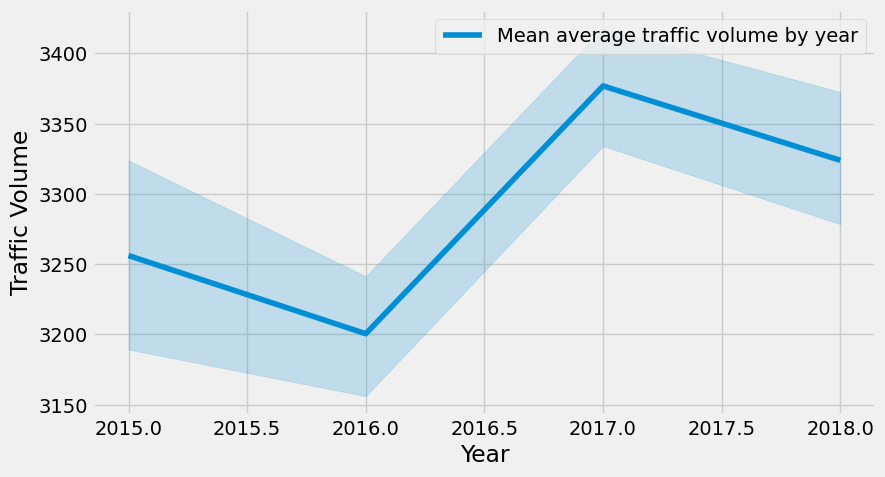

In [40]:
Y_TV = df[["traffic_volume", "date_time"]]
Y_TV["date_time"] = df.date_time.dt.year
plt.figure( figsize = ( 9, 5))
  
sns.lineplot( x = 'date_time', y = 'traffic_volume', data = Y_TV, label = 'Mean average traffic volume by year')

plt.ylabel('Traffic Volume')
plt.xlabel( 'Year')


In [41]:
Y_TV["category"] = "none"
Y_TV.loc[Y_TV.traffic_volume <=1000 , "category"] = "<1000"
Y_TV.loc[Y_TV.traffic_volume >1000 , "category"] = "1000-3000"
Y_TV.loc[Y_TV.traffic_volume >3000 , "category"] = "3000-5000"
Y_TV.loc[Y_TV.traffic_volume >5000 , "category"] = ">5000"


C:\Users\User\AppData\Local\Temp\ipykernel_23020\920291331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["category"] = "none"


In [42]:
Y_TV.category.value_counts()

3000-5000    8864
>5000        6200
<1000        5880
1000-3000    5639
Name: category, dtype: int64

- graph shows the traffic volume within categories or volume grouped by year.
- 2016 has a differnt distrubtion to the other 3 years as it the only year where the number of hours with a traffice volume of 1000-3000 is greater than that of over 5000 and below 1000.

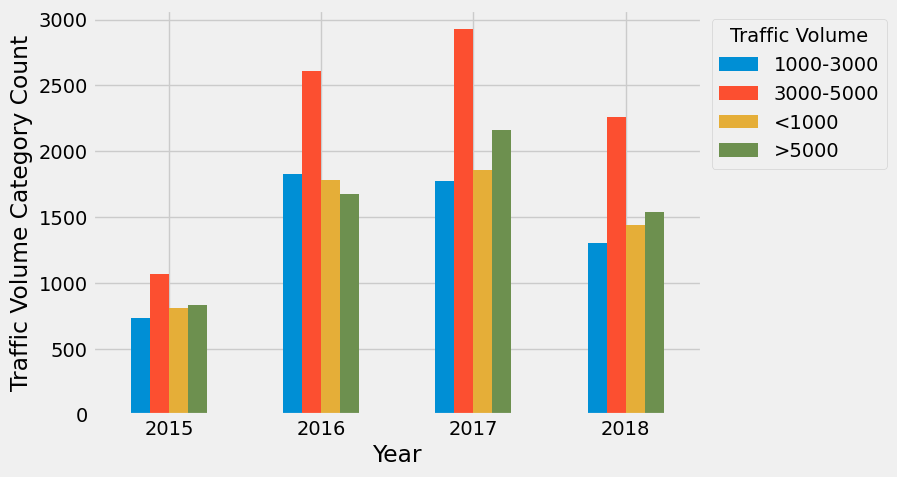

In [43]:
temp = Y_TV.groupby(['date_time']).category.value_counts().unstack()

Ntemp = temp.plot(kind='bar', figsize=(7, 5), xlabel='Year', ylabel='Traffic Volume Category Count', rot=0)
Ntemp.legend(title='Traffic Volume', bbox_to_anchor=(1, 1), loc='upper left')

### Month as a time-series

- graph shows a the dip and rise of the average traffic levels by month, with summers and winters having less traffic compared to spring and autumn.
- appears as if this feature will be useful.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\1037431365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["date_time"] = df.date_time.dt.month


Text(0.5, 0, 'Month')

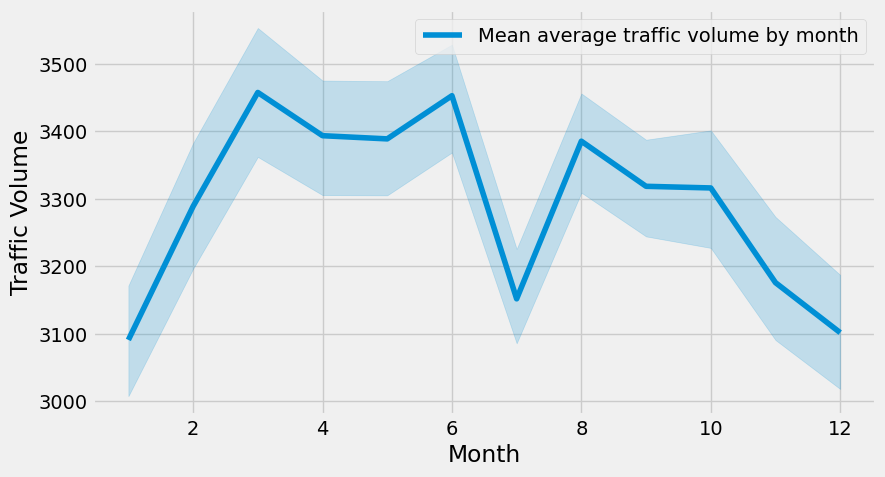

In [44]:
Y_TV = df[["traffic_volume", "date_time"]]
Y_TV["date_time"] = df.date_time.dt.month

plt.figure( figsize = ( 9, 5))
  
sns.lineplot( x = 'date_time', y = 'traffic_volume', data = Y_TV, label = 'Mean average traffic volume by month')

plt.ylabel('Traffic Volume')
plt.xlabel( 'Month')

- these bar charts give more context to the above graph although appear to be a bit misleading.
- the 7th, 8th and 9th month appear to be the busiest but this is just display as so because of the volume despite the average being low, meaning that they are likely just counted more because of the cycle of the recording data not ending at the same data it started.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\2695643052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["category"] = "none"


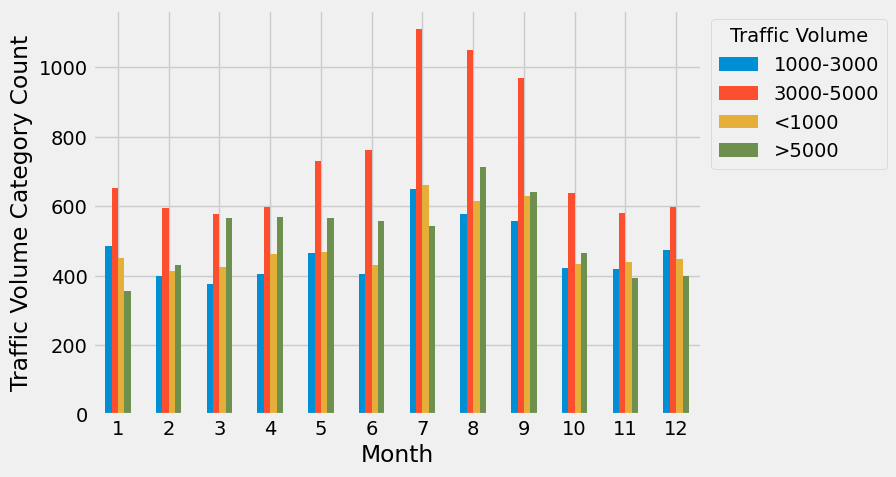

In [45]:
Y_TV["category"] = "none"
Y_TV.loc[Y_TV.traffic_volume <=1000 , "category"] = "<1000"
Y_TV.loc[Y_TV.traffic_volume >1000 , "category"] = "1000-3000"
Y_TV.loc[Y_TV.traffic_volume >3000 , "category"] = "3000-5000"
Y_TV.loc[Y_TV.traffic_volume >5000 , "category"] = ">5000"

temp = Y_TV.groupby(['date_time']).category.value_counts().unstack()

Ntemp = temp.plot(kind='bar', figsize=(7, 5), xlabel='Month', ylabel='Traffic Volume Category Count', rot=0)
Ntemp.legend(title='Traffic Volume', bbox_to_anchor=(1, 1), loc='upper left')

### Week as time-series

- this data doesn't show much new information that the month data did not give us.
- it shows the same patterns as before although demonstrating a larger dip that was unaccounted for before during the final 2 weeks of december. 

C:\Users\User\AppData\Local\Temp\ipykernel_23020\144175763.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Y_TV["date_time"] = df.date_time.dt.week
C:\Users\User\AppData\Local\Temp\ipykernel_23020\144175763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["date_time"] = df.date_time.dt.week


Text(0.5, 0, 'Week')

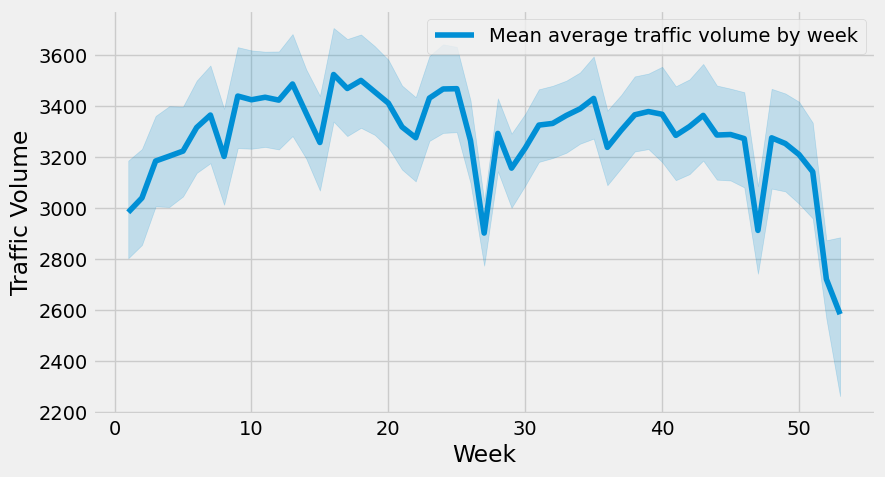

In [46]:
Y_TV = df[["traffic_volume", "date_time"]]
Y_TV["date_time"] = df.date_time.dt.week
plt.figure( figsize = ( 9, 5))
  
sns.lineplot( x = 'date_time', y = 'traffic_volume', data = Y_TV, label = 'Mean average traffic volume by week')

plt.ylabel('Traffic Volume')
plt.xlabel( 'Week')

C:\Users\User\AppData\Local\Temp\ipykernel_23020\1122856692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["category"] = "none"


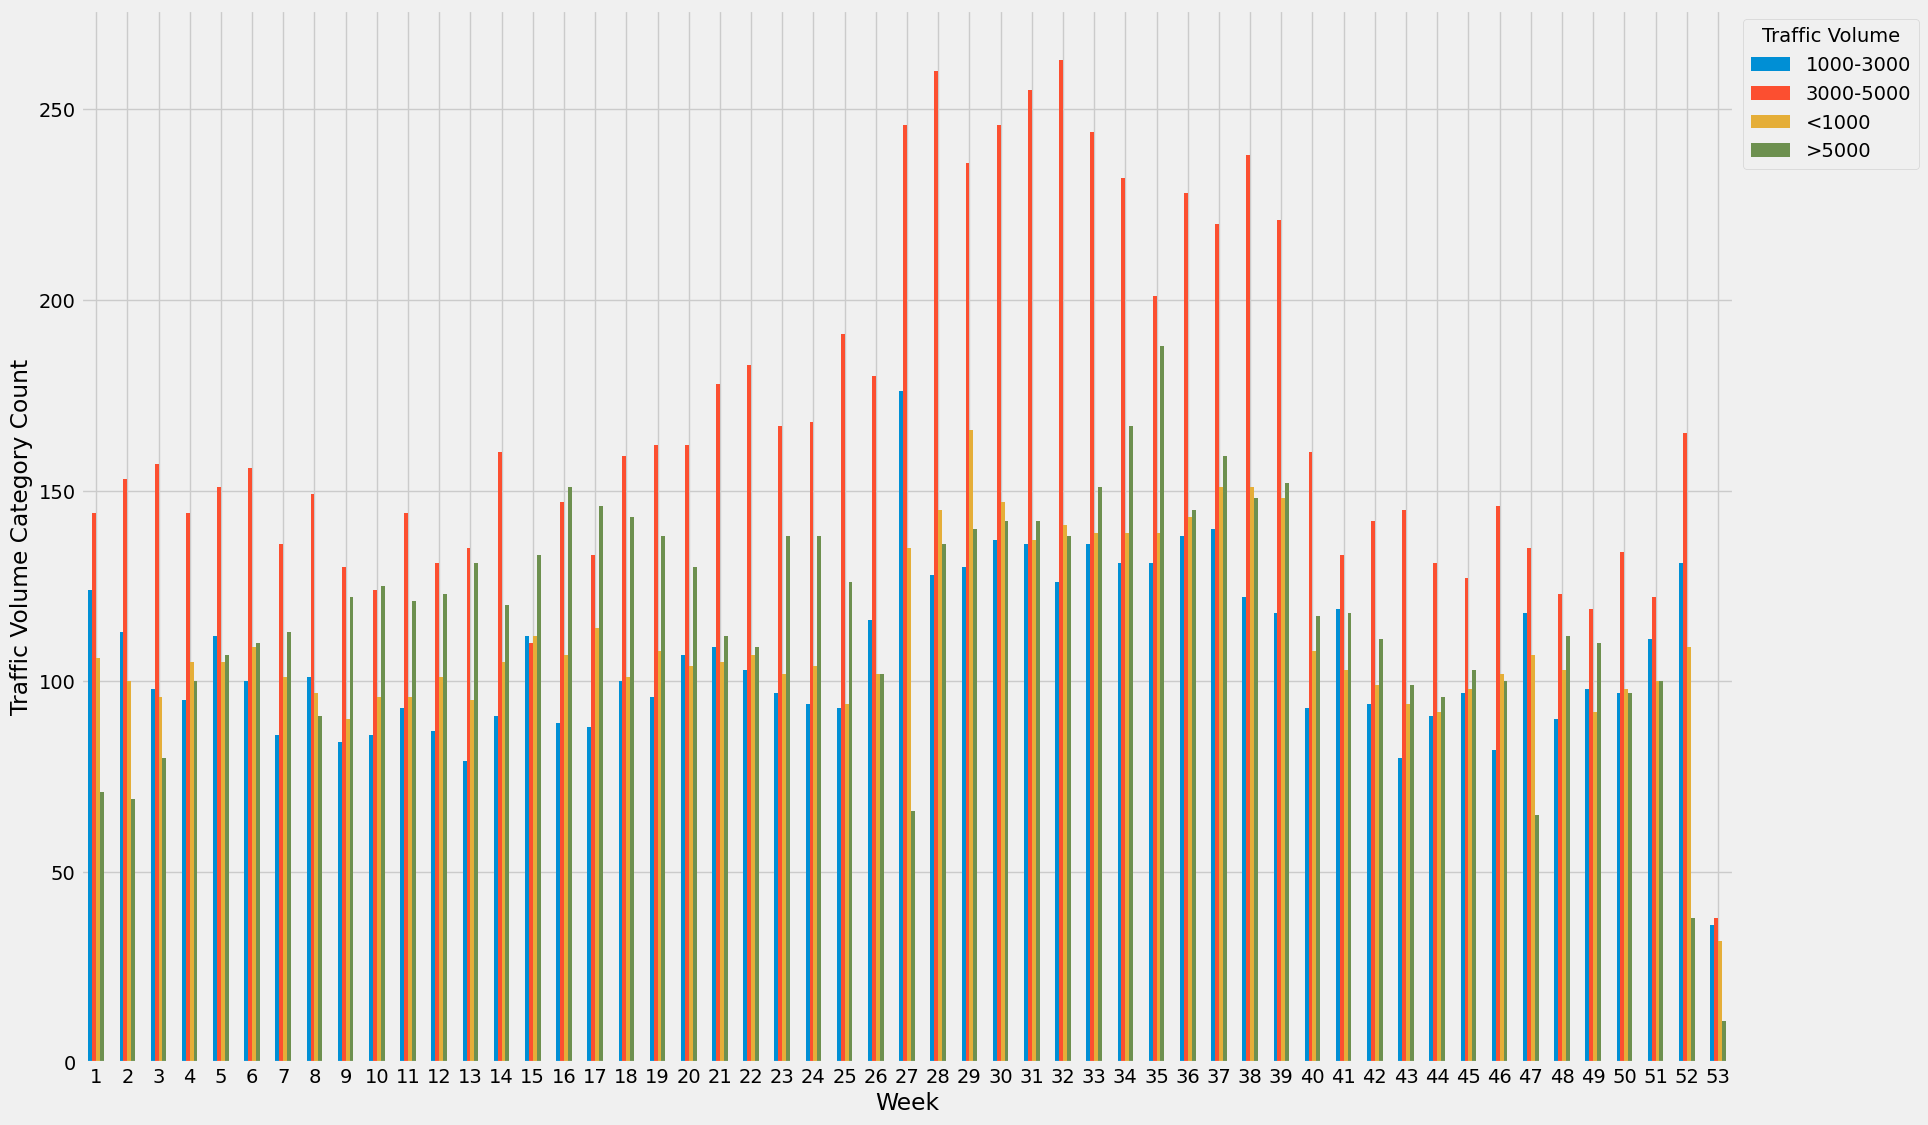

In [47]:
Y_TV["category"] = "none"
Y_TV.loc[Y_TV.traffic_volume <=1000 , "category"] = "<1000"
Y_TV.loc[Y_TV.traffic_volume >1000 , "category"] = "1000-3000"
Y_TV.loc[Y_TV.traffic_volume >3000 , "category"] = "3000-5000"
Y_TV.loc[Y_TV.traffic_volume >5000 , "category"] = ">5000"

temp = Y_TV.groupby(['date_time']).category.value_counts().unstack()

Ntemp = temp.plot(kind='bar', figsize=(19, 13), xlabel='Week', ylabel='Traffic Volume Category Count', rot=0)
Ntemp.legend(title='Traffic Volume', bbox_to_anchor=(1, 1), loc='upper left')



### Week day time-series
- graph shows a clear dip in the average amount of traffic on weekends and should be valuable in models.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\3517893361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["date_time"] = df.date_time.dt.weekday


Text(0.5, 0, 'Day of Week')

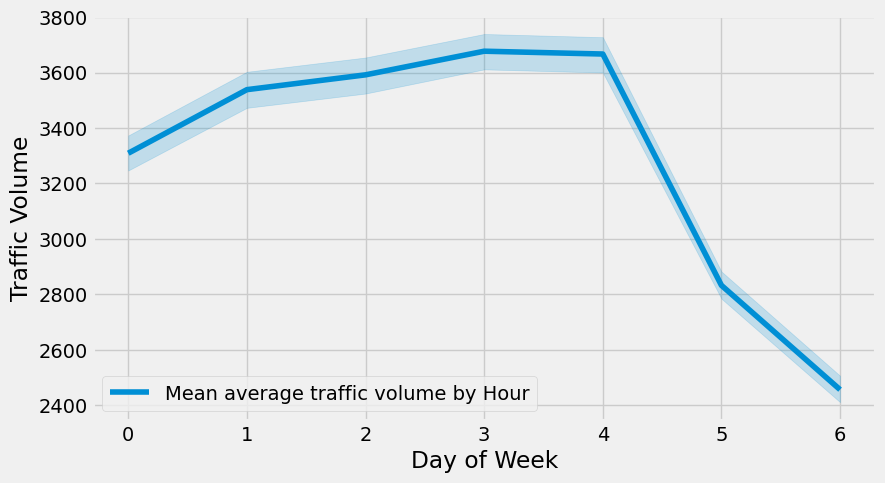

In [196]:
Y_TV = df[["traffic_volume", "date_time"]]
Y_TV["date_time"] = df.date_time.dt.weekday
plt.figure( figsize = ( 9, 5))
  
sns.lineplot( x = 'date_time', y = 'traffic_volume', data = Y_TV, label = 'Mean average traffic volume by Hour')

plt.ylabel('Traffic Volume')
plt.xlabel( 'Day of Week')

- interesting insights into how the amount of low traffic levels under 1000 vehicles perhour are not much higher on weekends but periods with a volume betwen 1000 and 5000 are much higher than when over 5000 relative to other days. 

C:\Users\User\AppData\Local\Temp\ipykernel_23020\346680933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["category"] = "none"


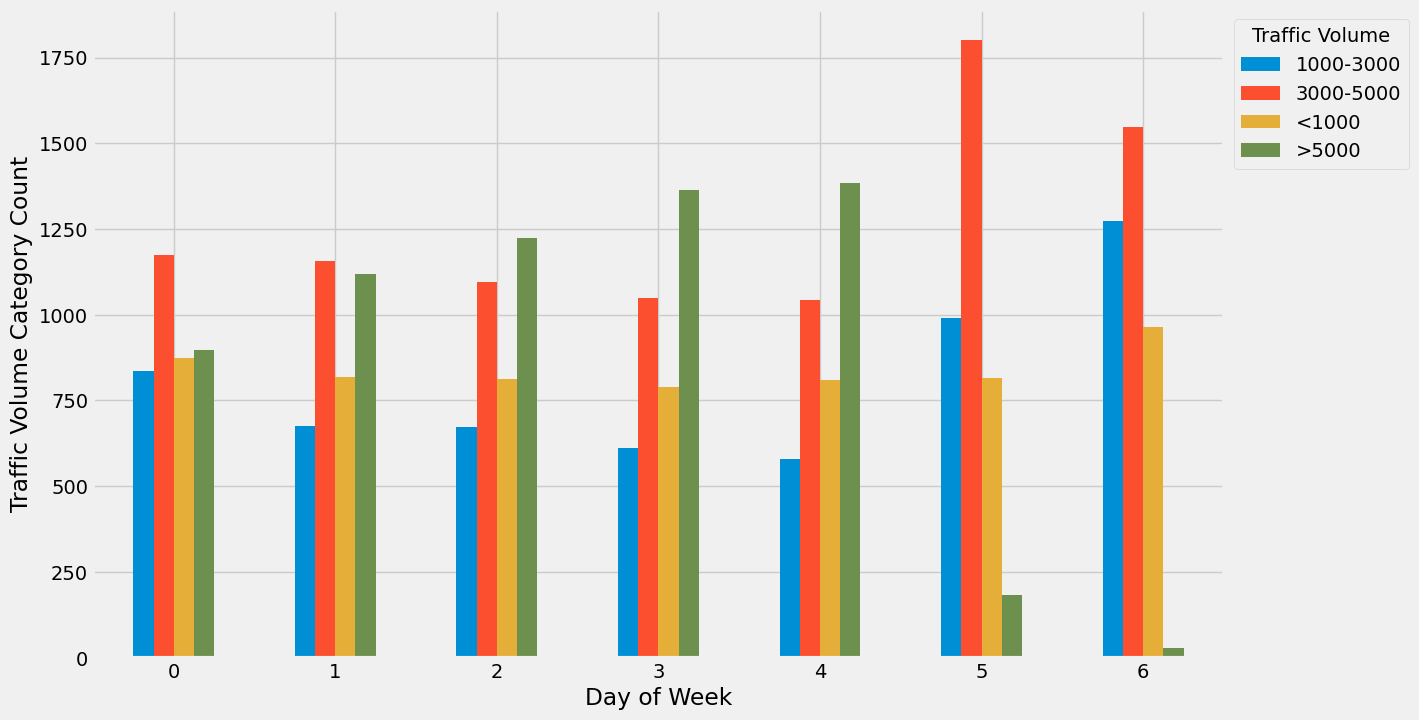

In [197]:
Y_TV["category"] = "none"
Y_TV.loc[Y_TV.traffic_volume <=1000 , "category"] = "<1000"
Y_TV.loc[Y_TV.traffic_volume >1000 , "category"] = "1000-3000"
Y_TV.loc[Y_TV.traffic_volume >3000 , "category"] = "3000-5000"
Y_TV.loc[Y_TV.traffic_volume >5000 , "category"] = ">5000"

temp = Y_TV.groupby(['date_time']).category.value_counts().unstack()

Ntemp = temp.plot(kind='bar', figsize=(13, 8), xlabel='Day of Week', ylabel='Traffic Volume Category Count', rot=0)
Ntemp.legend(title='Traffic Volume', bbox_to_anchor=(1, 1), loc='upper left')


### Hour as a time-series
- this graph shows a large variance in traffic volume based on time with averages extremely low in the early morning and very high during rush hours.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\924876984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["date_time"] = df.date_time.dt.hour


Text(0.5, 0, 'Hour')

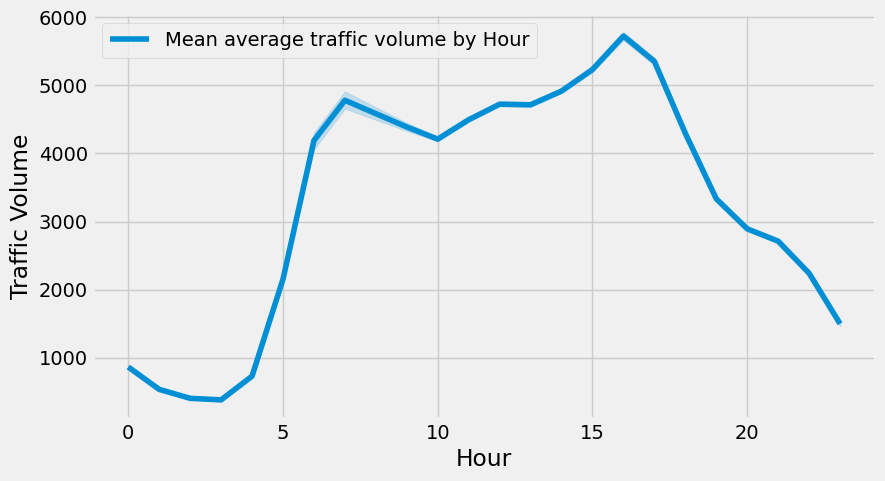

In [198]:
Y_TV = df[["traffic_volume", "date_time"]]
Y_TV["date_time"] = df.date_time.dt.hour
plt.figure( figsize = ( 9, 5))
  
sns.lineplot( x = 'date_time', y = 'traffic_volume', data = Y_TV, label = 'Mean average traffic volume by Hour')

plt.ylabel('Traffic Volume')
plt.xlabel( 'Hour')

- graph gives useful insights about the probabilities of traffic volume based off time of day.
- apart from 5am the chart shows a clear time when certain categories dominate and hence will be very useful in models.

C:\Users\User\AppData\Local\Temp\ipykernel_23020\724410317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_TV["category"] = "none"


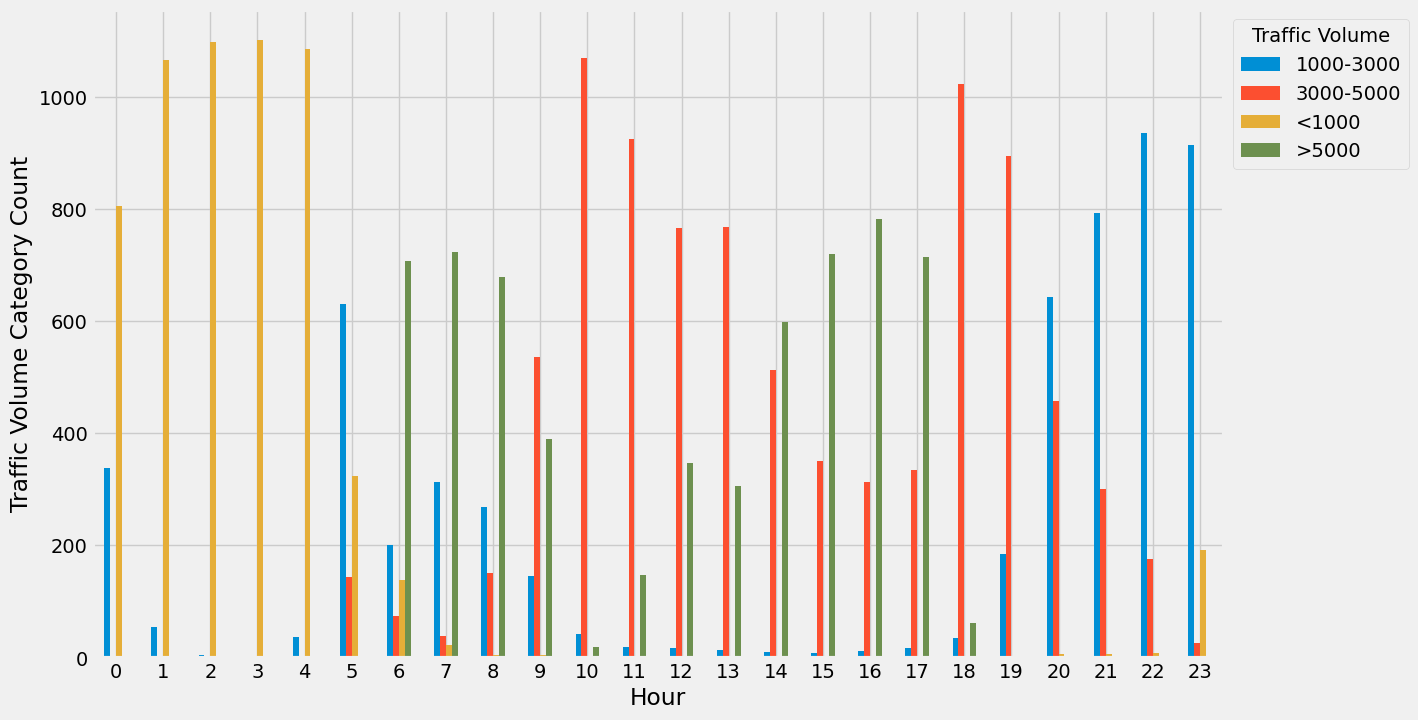

In [199]:
Y_TV["category"] = "none"
Y_TV.loc[Y_TV.traffic_volume <=1000 , "category"] = "<1000"
Y_TV.loc[Y_TV.traffic_volume >1000 , "category"] = "1000-3000"
Y_TV.loc[Y_TV.traffic_volume >3000 , "category"] = "3000-5000"
Y_TV.loc[Y_TV.traffic_volume >5000 , "category"] = ">5000"

temp = Y_TV.groupby(['date_time']).category.value_counts().unstack()

Ntemp = temp.plot(kind='bar', figsize=(13, 8), xlabel='Hour', ylabel='Traffic Volume Category Count', rot=0)
Ntemp.legend(title='Traffic Volume', bbox_to_anchor=(1, 1), loc='upper left')


## Task 2

- Creating feature that shows hours of the day, day of week and month

In [50]:
df["DOW"] = df.date_time.dt.dayofweek

In [51]:
df["HOUR"] = df.date_time.dt.hour

In [52]:
df["MONTH"] = df.date_time.dt.month

- Some brief evaluation of new features with a correlation matrix

In [53]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\User\AppData\Local\Temp\ipykernel_23020\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH
rain_1h,1.000000,0.001674,0.072287,0.075044,-0.016474,-0.017804,-0.005473,0.034892
snow_1h,0.001674,1.000000,-0.024895,0.031385,-0.002665,-0.014213,0.010577,0.018789
temp,0.072287,-0.024895,1.000000,-0.073849,0.131026,-0.010034,0.141434,0.250103
clouds_all,0.075044,0.031385,-0.073849,1.000000,0.112341,-0.054802,0.074426,-0.022099
traffic_volume,-0.016474,-0.002665,0.131026,0.112341,1.000000,-0.141463,0.357705,-0.013987
DOW,-0.017804,-0.014213,-0.010034,-0.054802,-0.141463,1.000000,-0.000717,0.008536
HOUR,-0.005473,0.010577,0.141434,0.074426,0.357705,-0.000717,1.000000,0.005617
MONTH,0.034892,0.018789,0.250103,-0.022099,-0.013987,0.008536,0.005617,1.000000


In [54]:
df

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,3,7
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,4,7
...,...,...,...,...,...,...,...,...,...
26578,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543,6,19,9
26579,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781,6,20,9
26580,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159,6,21,9
26581,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450,6,22,9


In [55]:
df.DOW.value_counts()

4    3815
3    3814
6    3812
2    3804
5    3788
0    3783
1    3767
Name: DOW, dtype: int64

In [56]:
df.HOUR.value_counts()

0     1144
23    1133
12    1133
10    1132
14    1123
4     1122
1     1121
6     1121
18    1121
22    1120
16    1110
20    1107
8     1104
2     1103
21    1101
3     1101
7     1097
5     1097
11    1094
13    1092
19    1082
15    1081
9     1076
17    1068
Name: HOUR, dtype: int64

In [57]:
df.MONTH.value_counts()

7     2966
8     2957
9     2801
5     2230
6     2158
4     2033
10    1957
1     1947
3     1945
12    1920
2     1838
11    1831
Name: MONTH, dtype: int64

In [58]:
# first drop the date time column as its not useable in regressor models
df1= df.drop("date_time", axis=1)
#shuffling
df1= shuffle(df1)

In [59]:
y= df1.traffic_volume
y

8639     4575
23859    2686
3226      838
16611     933
17741    4506
         ... 
3302     3854
21472    5728
6083     2945
15786    5833
1662     4601
Name: traffic_volume, Length: 26583, dtype: int64

In [60]:
x= df1.drop("traffic_volume", axis=1)
x

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH
8639,0.0,0.00,295.20,1,4,13,9
23859,0.0,0.00,291.44,90,5,8,6
3226,0.0,0.00,264.44,90,4,4,12
16611,0.0,0.00,288.95,40,3,4,8
17741,0.0,0.00,287.61,90,1,10,9
...,...,...,...,...,...,...,...
3302,0.0,0.06,273.83,90,2,18,12
21472,0.0,0.00,267.14,5,3,8,3
6083,0.0,0.00,293.62,20,2,21,5
15786,0.0,0.00,305.95,40,3,17,7


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

- check it was done corretly and that indexes match up

In [62]:
x_train.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH
5467,0.0,0.0,278.46,40,5,4,4
19482,0.0,0.0,267.58,90,4,7,12
6449,0.0,0.0,293.17,0,4,4,6


In [63]:
y_train.head(3)

5467      413
19482    6081
6449      839
Name: traffic_volume, dtype: int64

In [64]:
x_test.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH
6448,0.0,0.0,293.62,0,4,3,6
8776,0.0,0.0,287.35,90,3,6,9
3891,0.0,0.0,274.36,1,6,2,1


In [65]:
y_test.head(3)

6448     369
8776    4885
3891     642
Name: traffic_volume, dtype: int64

### building models

In [66]:
LR = LinearRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

0.15918115871414584

In [67]:
lr_preds = LR.predict(x_test)

- Because some of the Y values are zero some measurements like MAPE are not suitable

In [68]:
y.min()

0

In [69]:
lr_preds = LR.predict(x_test)

print("R2: ", r2_score(y_test,lr_preds))
print("MAE: ",mean_absolute_error(y_test,lr_preds))
print("MSE: ",mean_squared_error(y_test,lr_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds)))

R2:  0.15918115871414584
MAE:  1581.232795122061
MSE:  3254686.171273395
RMSE 1804.0748796193009


In [70]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
RF.score(x_test, y_test)

0.9401292132875174

In [71]:
rf_preds = RF.predict(x_test)

print("R2: ", r2_score(y_test,rf_preds))
print("MAE: ",mean_absolute_error(y_test,rf_preds))
print("MSE: ",mean_squared_error(y_test,rf_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds)))

R2:  0.9401292132875174
MAE:  274.6217547453497
MSE:  231751.01699478814
RMSE 481.4052523547995


- In the risidula error plots you can see the distribution of predictions relative to the correct answer.
- When values are on the line it means there is 0 error.
- There is clearly a greater degree of error in the Linear Regression model as is relected in the R2 score.

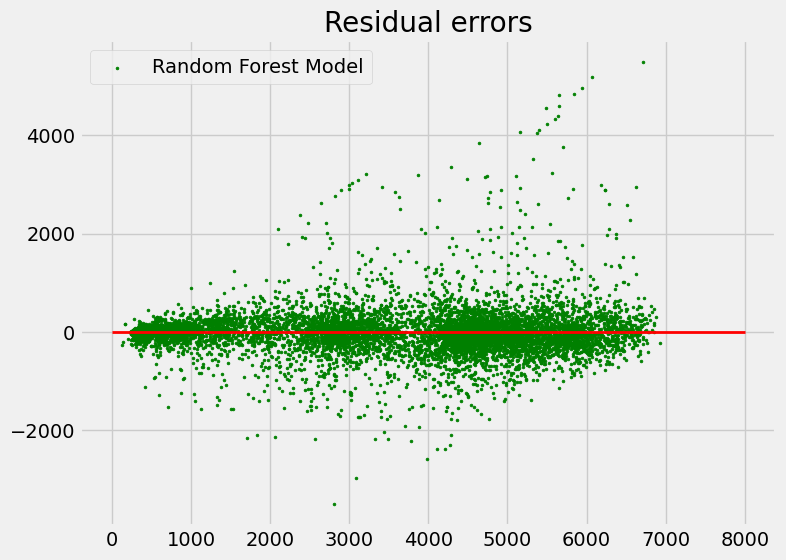

In [72]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/

plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')

y_test_array = y_test.to_numpy() 
#scatter_var = scatter_var.reshape(6898,1)

# residual errors in test data plot
plt.scatter(rf_preds, rf_preds - y_test_array, color = "green", s = 4, label = 'Random Forest Model')
 
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 8000, linewidth = 2, color = "red")
 
# positioning the key   
plt.legend(loc = 'upper left')


plt.title("Residual errors")
 
plt.show()

Text(0.5, 1.0, 'Residual errors')

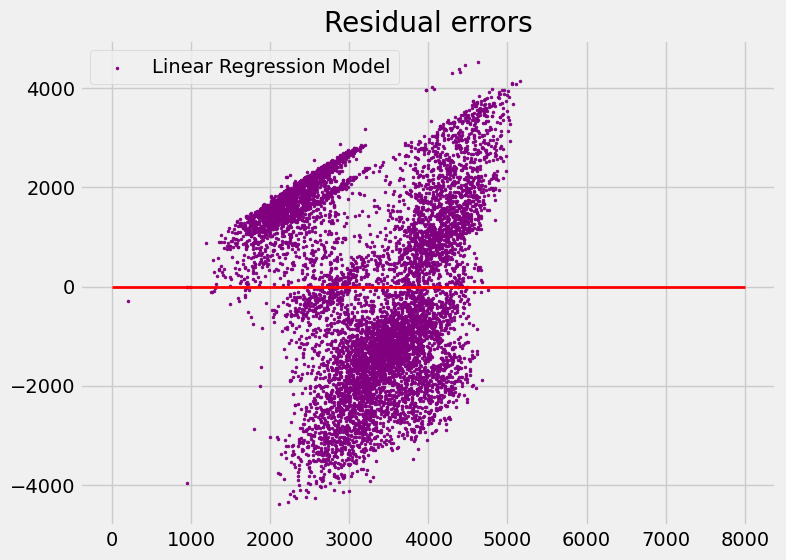

In [73]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')

y_test_array = y_test.to_numpy() 

# residual errors in test data plot
plt.scatter(lr_preds, lr_preds - y_test_array, color = "purple", s = 4, label = 'Linear Regression Model')
 
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 8000, linewidth = 2, color = "red")
 
# positioning the key   
plt.legend(loc = 'upper left')


plt.title("Residual errors")

## Part 3

In [75]:
df

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,3,7
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,4,7
...,...,...,...,...,...,...,...,...,...
26578,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543,6,19,9
26579,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781,6,20,9
26580,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159,6,21,9
26581,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450,6,22,9


- did manual check and foud that the days are correctly numbered from 0 to 6 with sunday being 6 and monday being 0.
- can see from examining the data above that the month and hour columns appear correct too.


- chose to use sine/cosine as it reduced the amount of features used which is more practical for training time and easier to encode than cyclical dummy variables

In [76]:
df['DOW_sin'] = np.sin(df.DOW*(2.*np.pi/7))
df['DOW_cos'] = np.cos(df.DOW*(2.*np.pi/7))

In [77]:
df['MONTH_sin'] = np.sin(df.MONTH*(2.*np.pi/12))
df['MONTH_cos'] = np.cos(df.MONTH*(2.*np.pi/12))

In [78]:
df['HOUR_sin'] = np.sin(df.HOUR*(2.*np.pi/24))
df['HOUR_cos'] = np.cos(df.HOUR*(2.*np.pi/24))

In [79]:
df.head(3)

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7,0.974928,-0.222521,-0.5,-0.866025,0.000000,1.000000
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7,0.974928,-0.222521,-0.5,-0.866025,0.258819,0.965926
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7,0.974928,-0.222521,-0.5,-0.866025,0.500000,0.866025


In [80]:
# check to see it worked correctly 
nots = df.loc[(df.HOUR<22) & (df.HOUR>2)]
df[~df.isin(nots)].dropna()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
0,2015-07-01 00:00:00,0.0,0.0,289.20,1.0,737.0,2.0,0.0,7.0,0.974928,-0.222521,-0.5,-8.660254e-01,0.000000,1.000000
1,2015-07-01 01:00:00,0.0,0.0,289.40,1.0,444.0,2.0,1.0,7.0,0.974928,-0.222521,-0.5,-8.660254e-01,0.258819,0.965926
2,2015-07-01 02:00:00,0.0,0.0,289.19,1.0,347.0,2.0,2.0,7.0,0.974928,-0.222521,-0.5,-8.660254e-01,0.500000,0.866025
21,2015-07-01 22:00:00,0.0,0.0,289.67,1.0,2356.0,2.0,22.0,7.0,0.974928,-0.222521,-0.5,-8.660254e-01,-0.500000,0.866025
22,2015-07-01 23:00:00,0.0,0.0,288.10,1.0,2820.0,2.0,23.0,7.0,0.974928,-0.222521,-0.5,-8.660254e-01,-0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26559,2018-09-30 00:00:00,0.0,0.0,280.30,90.0,1826.0,6.0,0.0,9.0,-0.781831,0.623490,-1.0,-1.836970e-16,0.000000,1.000000
26560,2018-09-30 01:00:00,0.0,0.0,280.19,90.0,920.0,6.0,1.0,9.0,-0.781831,0.623490,-1.0,-1.836970e-16,0.258819,0.965926
26561,2018-09-30 02:00:00,0.0,0.0,280.07,90.0,696.0,6.0,2.0,9.0,-0.781831,0.623490,-1.0,-1.836970e-16,0.500000,0.866025
26581,2018-09-30 22:00:00,0.0,0.0,282.09,90.0,1450.0,6.0,22.0,9.0,-0.781831,0.623490,-1.0,-1.836970e-16,-0.500000,0.866025


In [134]:
df1 = df.drop("date_time", axis=1)
df1= shuffle(df1)
df1.head(3)

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
3361,0.0,0.0,267.22,90,285,6,4,12,-0.781831,0.623490,-2.449294e-16,1.0,0.866025,0.500000
1072,1.2,0.0,298.10,1,2560,4,22,8,-0.433884,-0.900969,-8.660254e-01,-0.5,-0.500000,0.866025
14985,0.0,0.0,296.48,1,658,5,4,6,-0.974928,-0.222521,1.224647e-16,-1.0,0.866025,0.500000


In [135]:
train, test = train_test_split(df1, test_size=0.33)

In [136]:
y_train= train.traffic_volume
y_train

20747     249
4375     1420
4281      307
2290      331
18421    3496
         ... 
14494    4517
10062    5444
11575     919
17345    3547
1768     2910
Name: traffic_volume, Length: 17810, dtype: int64

In [137]:
y_test= test.traffic_volume
y_test

11015    3584
13997    1378
12545    3779
7191      291
20022    2597
         ... 
12191    4323
6188      895
16796    2547
7546     2628
25932    2081
Name: traffic_volume, Length: 8773, dtype: int64

In [138]:
x_test = test.drop(["traffic_volume"], axis=1)
x_test

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
11015,0.00,0.0,251.360,1,6,15,12,-0.781831,0.623490,-2.449294e-16,1.000000e+00,-0.707107,-7.071068e-01
13997,0.00,0.0,283.540,1,6,0,4,-0.781831,0.623490,8.660254e-01,-5.000000e-01,0.000000,1.000000e+00
12545,0.00,0.0,286.548,92,0,18,2,0.000000,1.000000,8.660254e-01,5.000000e-01,-1.000000,-1.836970e-16
7191,0.00,0.0,295.620,90,0,2,7,0.000000,1.000000,-5.000000e-01,-8.660254e-01,0.500000,8.660254e-01
20022,0.00,0.0,250.680,40,5,20,12,-0.974928,-0.222521,-2.449294e-16,1.000000e+00,-0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,0.00,0.0,268.430,20,6,15,2,-0.781831,0.623490,8.660254e-01,5.000000e-01,-0.707107,-7.071068e-01
6188,0.00,0.0,285.590,20,0,6,5,0.000000,1.000000,5.000000e-01,-8.660254e-01,1.000000,6.123234e-17
16796,0.00,0.0,292.940,40,3,22,8,0.433884,-0.900969,-8.660254e-01,-5.000000e-01,-0.500000,8.660254e-01
7546,0.00,0.0,297.430,1,0,21,7,0.000000,1.000000,-5.000000e-01,-8.660254e-01,-0.707107,7.071068e-01


In [139]:
x_train = train.drop(["traffic_volume"], axis=1)
x_train

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
20747,0.0,0.0,255.42,1,1,2,1,0.781831,0.623490,0.500000,8.660254e-01,0.500000,0.866025
4375,0.0,0.0,275.15,1,5,0,2,-0.974928,-0.222521,0.866025,5.000000e-01,0.000000,1.000000
4281,0.0,0.0,270.30,1,6,4,2,-0.781831,0.623490,0.866025,5.000000e-01,0.866025,0.500000
2290,0.0,0.0,282.82,75,4,2,10,-0.433884,-0.900969,-0.866025,5.000000e-01,0.500000,0.866025
18421,0.0,0.0,281.08,75,1,19,10,0.781831,0.623490,-0.866025,5.000000e-01,-0.965926,0.258819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14494,0.0,0.0,299.02,5,5,17,5,-0.974928,-0.222521,0.500000,-8.660254e-01,-0.965926,-0.258819
10062,0.0,0.0,284.62,1,1,17,11,0.781831,0.623490,-0.500000,8.660254e-01,-0.965926,-0.258819
11575,0.0,0.0,257.47,1,1,23,1,0.781831,0.623490,0.500000,8.660254e-01,-0.258819,0.965926
17345,0.0,0.0,295.49,40,5,19,9,-0.974928,-0.222521,-1.000000,-1.836970e-16,-0.965926,0.258819


In [140]:
x_train1 = x_train.drop(["HOUR", "DOW", "MONTH"], axis=1)
x_test1 = x_test.drop(["HOUR", "DOW", "MONTH"], axis=1)

In [182]:
x_train2 = x_train.drop(["HOUR_cos", "HOUR_sin", "DOW_cos", "DOW_sin", "MONTH_cos", "MONTH_sin"], axis=1)
x_test2 = x_test.drop(["HOUR_cos", "HOUR_sin", "DOW_cos", "DOW_sin", "MONTH_cos", "MONTH_sin"], axis=1)

In [183]:
x_train2.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH
20747,0.0,0.0,255.42,1,1,2,1
4375,0.0,0.0,275.15,1,5,0,2
4281,0.0,0.0,270.30,1,6,4,2


In [141]:
x_train1.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
20747,0.0,0.0,255.42,1,0.781831,0.623490,0.500000,0.866025,0.500000,0.866025
4375,0.0,0.0,275.15,1,-0.974928,-0.222521,0.866025,0.500000,0.000000,1.000000
4281,0.0,0.0,270.30,1,-0.781831,0.623490,0.866025,0.500000,0.866025,0.500000


In [142]:
y_train.head(3)

20747     249
4375     1420
4281      307
Name: traffic_volume, dtype: int64

In [184]:
x_test2.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH
11015,0.0,0.0,251.360,1,6,15,12
13997,0.0,0.0,283.540,1,6,0,4
12545,0.0,0.0,286.548,92,0,18,2


In [143]:
x_test1.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
11015,0.0,0.0,251.360,1,-0.781831,0.62349,-2.449294e-16,1.0,-0.707107,-7.071068e-01
13997,0.0,0.0,283.540,1,-0.781831,0.62349,8.660254e-01,-0.5,0.000000,1.000000e+00
12545,0.0,0.0,286.548,92,0.000000,1.00000,8.660254e-01,0.5,-1.000000,-1.836970e-16


In [144]:
y_test.head(3)

11015    3584
13997    1378
12545    3779
Name: traffic_volume, dtype: int64

- In the linear regession model there is a clear improvement achieved through the use of cyclical data with all scores improving as well as a less erratically distributed risidual errors plot.
- In the Random Forest model there is a much less impressive yet still noticeable improvement in the results. Every score improves slightly although the defference is in the single digits for each one.

In [187]:
LR2 = LinearRegression()
LR2.fit(x_train1, y_train)

lr_preds2 = LR2.predict(x_test1)

print("With cyclical time data")
print("R2: ", r2_score(y_test,lr_preds2))
print("MAE: ",mean_absolute_error(y_test,lr_preds2))
print("MSE: ",mean_squared_error(y_test,lr_preds2))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds2)))

LR1 = LinearRegression()
LR1.fit(x_train2, y_train)

lr_preds1 = LR1.predict(x_test2)

print("\nWithout cyclical time data")
print("R2: ", r2_score(y_test,lr_preds1))
print("MAE: ",mean_absolute_error(y_test,lr_preds1))
print("MSE: ",mean_squared_error(y_test,lr_preds1))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds1)))

With cyclical time data
R2:  0.6984703151871707
MAE:  839.9672503627523
MSE:  1189783.446052936
RMSE 1090.7719496085954

Without cyclical time data
R2:  0.17207160820011125
MAE:  1590.7236083793348
MSE:  3266860.7593053314
RMSE 1807.4459215438042


In [189]:
RF2 = RandomForestRegressor()
RF2.fit(x_train1, y_train)

rf_preds2 = RF2.predict(x_test1)

print("With cyclical time data")
print("R2: ", r2_score(y_test,rf_preds2))
print("MAE: ",mean_absolute_error(y_test,rf_preds2))
print("MSE: ",mean_squared_error(y_test,rf_preds2))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds2)))

RF1 = RandomForestRegressor()
RF1.fit(x_train2, y_train)

rf_preds1 = RF1.predict(x_test2)

print("\nWithout cyclical time data")
print("R2: ", r2_score(y_test,rf_preds1))
print("MAE: ",mean_absolute_error(y_test,rf_preds1))
print("MSE: ",mean_squared_error(y_test,rf_preds1))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds1)))

With cyclical time data
R2:  0.941508872832281
MAE:  271.21434148333907
MSE:  230795.76688553032
RMSE 480.41208028684116

Without cyclical time data
R2:  0.9401036903674267
MAE:  273.926280614765
MSE:  236340.37134596784
RMSE 486.1485075015327


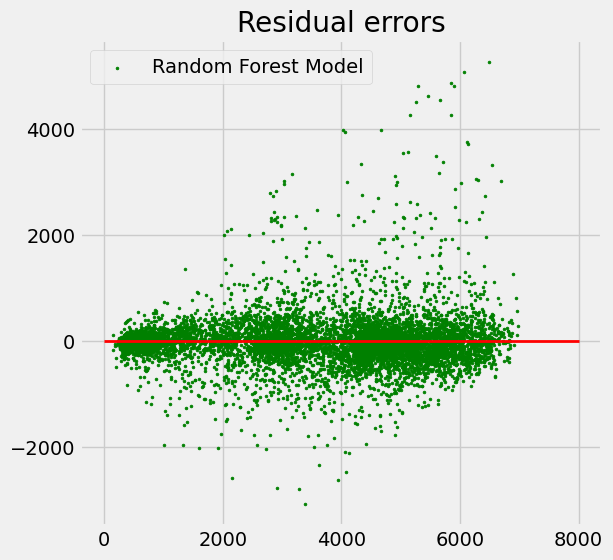

In [147]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/

plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')

y_test_array = y_test.to_numpy() 
#scatter_var = scatter_var.reshape(6898,1)

# residual errors in test data plot
plt.scatter(rf_preds2, rf_preds2 - y_test_array, color = "green", s = 4, label = 'Random Forest Model')
 
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 8000, linewidth = 2, color = "red")
 
# positioning the key   
plt.legend(loc = 'upper left')


plt.title("Residual errors")
 
plt.show()

Text(0.5, 1.0, 'Residual errors')

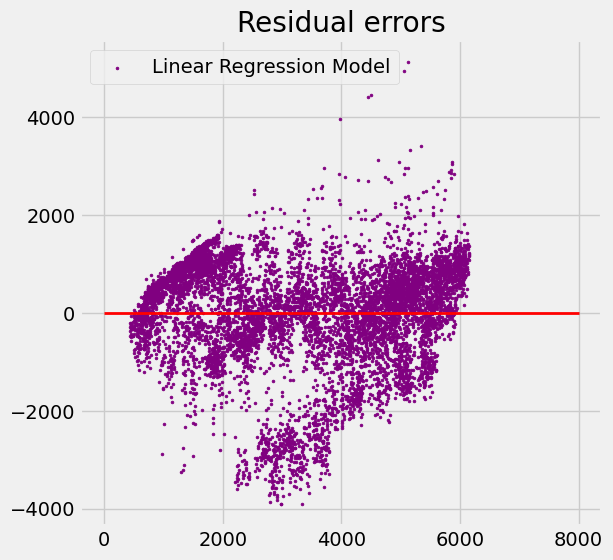

In [148]:
plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')

y_test_array = y_test.to_numpy() 

# residual errors in test data plot
plt.scatter(lr_preds2, lr_preds2 - y_test_array, color = "purple", s = 4, label = 'Linear Regression Model')
 
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 8000, linewidth = 2, color = "red")
 
# positioning the key   
plt.legend(loc = 'upper left')


plt.title("Residual errors")

## Part 4

In [190]:
x_train

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
20747,0.0,0.0,255.42,1,1,2,1,0.781831,0.623490,0.500000,8.660254e-01,0.500000,0.866025
4375,0.0,0.0,275.15,1,5,0,2,-0.974928,-0.222521,0.866025,5.000000e-01,0.000000,1.000000
4281,0.0,0.0,270.30,1,6,4,2,-0.781831,0.623490,0.866025,5.000000e-01,0.866025,0.500000
2290,0.0,0.0,282.82,75,4,2,10,-0.433884,-0.900969,-0.866025,5.000000e-01,0.500000,0.866025
18421,0.0,0.0,281.08,75,1,19,10,0.781831,0.623490,-0.866025,5.000000e-01,-0.965926,0.258819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14494,0.0,0.0,299.02,5,5,17,5,-0.974928,-0.222521,0.500000,-8.660254e-01,-0.965926,-0.258819
10062,0.0,0.0,284.62,1,1,17,11,0.781831,0.623490,-0.500000,8.660254e-01,-0.965926,-0.258819
11575,0.0,0.0,257.47,1,1,23,1,0.781831,0.623490,0.500000,8.660254e-01,-0.258819,0.965926
17345,0.0,0.0,295.49,40,5,19,9,-0.974928,-0.222521,-1.000000,-1.836970e-16,-0.965926,0.258819


In [151]:
x_test.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
11015,0.0,0.0,251.360,1,6,15,12,-0.781831,0.62349,-2.449294e-16,1.0,-0.707107,-7.071068e-01
13997,0.0,0.0,283.540,1,6,0,4,-0.781831,0.62349,8.660254e-01,-0.5,0.000000,1.000000e+00
12545,0.0,0.0,286.548,92,0,18,2,0.000000,1.00000,8.660254e-01,0.5,-1.000000,-1.836970e-16


In [154]:
test.head(3)

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
16945,0.0,0.0,288.42,90,342,3,3,8,0.433884,-0.900969,-8.660254e-01,-0.5,7.071068e-01,0.707107
20879,0.0,0.0,256.36,5,3508,6,15,2,-0.781831,0.623490,8.660254e-01,0.5,-7.071068e-01,-0.707107
11132,0.0,0.0,274.90,90,4956,4,12,12,-0.433884,-0.900969,-2.449294e-16,1.0,1.224647e-16,-1.000000


- firstly chose to make some basic correlation charts to get brief overview of the features.
- most important thing to analyse here was the correlation with the target feature.
    - the 3 HOUR variables have the highest correlation with traffic volume with the 3 DOW variables also have and temp also appearing valuable.
- the correlation matrix also has value in identifying which X variables are redundent because they are closely correlated with other X variables
    - as is obvious, there is a high correlation between the cosine/sine variables and their original time scale variables.
    - there's an intersting correlation between temperature and the MONTH features suggesting it may not be necessary to include both.
        - although it is odd that temperature has a weak correlation with the other whether variables

In [155]:
train.corrwith(train["traffic_volume"])

rain_1h          -0.018304
snow_1h          -0.006009
temp              0.128653
clouds_all        0.111677
traffic_volume    1.000000
DOW              -0.138983
HOUR              0.354295
MONTH            -0.012071
DOW_sin           0.164455
DOW_cos          -0.111028
MONTH_sin         0.009398
MONTH_cos        -0.029516
HOUR_sin         -0.257024
HOUR_cos         -0.763888
dtype: float64

In [156]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
rain_1h,1.000000,0.002779,0.072012,0.071865,-0.018304,-0.021578,0.000255,0.037120,0.023535,0.001215,-0.084423,-0.049508,0.000420,0.016793
snow_1h,0.002779,1.000000,-0.027447,0.034173,-0.006009,-0.015978,0.012165,0.020527,0.010386,0.004615,0.008341,0.041396,-0.006129,0.002274
temp,0.072012,-0.027447,1.000000,-0.071206,0.128653,-0.008608,0.146083,0.261033,-0.007589,0.026156,-0.519587,-0.712222,-0.194680,-0.089236
clouds_all,0.071865,0.034173,-0.071206,1.000000,0.111677,-0.050655,0.067515,-0.024526,0.045819,0.013421,0.107268,0.099580,-0.067617,-0.122993
traffic_volume,-0.018304,-0.006009,0.128653,0.111677,1.000000,-0.138983,0.354295,-0.012071,0.164455,-0.111028,0.009398,-0.029516,-0.257024,-0.763888
DOW,-0.021578,-0.015978,-0.008608,-0.050655,-0.138983,1.000000,-0.002153,0.011681,-0.736446,-0.348150,-0.004884,0.000946,-0.000641,-0.006821
HOUR,0.000255,0.012165,0.146083,0.067515,0.354295,-0.002153,1.000000,0.004976,0.010307,-0.011072,-0.007503,-0.008587,-0.777198,-0.093862
MONTH,0.037120,0.020527,0.261033,-0.024526,-0.012071,0.011681,0.004976,1.000000,-0.005156,-0.013760,-0.762228,0.171278,-0.009550,-0.000849
DOW_sin,0.023535,0.010386,-0.007589,0.045819,0.164455,-0.736446,0.010307,-0.005156,1.000000,-0.000327,0.002826,0.001125,-0.007310,0.005479
DOW_cos,0.001215,0.004615,0.026156,0.013421,-0.111028,-0.348150,-0.011072,-0.013760,-0.000327,1.000000,0.003704,0.002390,0.008766,0.003948


- Using mutual information regessor to identify the level of discrimination by feature.
- Very similar idea to the correlation Matrix but different calculations.
- snow is ranked as last with the 3 Hour features first, followed by day of week, with temperature being the most valuable whether feature.

In [157]:
# code used in tutorial notebook "11 DimRed Tutorial Soln"
i_scores = mutual_info_regression(x_train, y_train)

FS_DF = pd.DataFrame(i_scores,index = x_train.columns, columns =['Information Gain'])
FS_DF.sort_values(by=['Information Gain'],ascending=False,inplace=True)
FS_DF

,Information Gain
HOUR,1.274714
HOUR_cos,0.904910
HOUR_sin,0.693021
DOW,0.136408
DOW_sin,0.135099
temp,0.052048
DOW_cos,0.036674
clouds_all,0.032131
MONTH,0.031604
MONTH_sin,0.023324


###### recursive feature elimination
- list is created by removing the worst ones so will not rank the best remaining ones
- seperate one is done for each model.
- each model values different features.
- interesting takeaway from this process is that the linear regression model identifies snow as a top 3 feature despite it hacing the lowest score for information gain.
- There is a clear preference for the time series data in both, in the order of; hour, day, month.


In [158]:
from sklearn.feature_selection import RFE
for n in range(3, 10,2):
    estimator = RandomForestRegressor()
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(x_train, y_train)
    rfe_mask = selector.get_support() 
    new_features = [] 
    for bool, feature in zip(rfe_mask, x_train.columns):
        if bool:
            new_features.append(feature)
    print(f"\n Top {n} features: ")
    for i in new_features:
        print(i)


 Top 3 features: 
HOUR
DOW_sin
HOUR_cos

 Top 5 features: 
temp
HOUR
DOW_sin
HOUR_sin
HOUR_cos

 Top 7 features: 
temp
DOW
HOUR
DOW_sin
MONTH_cos
HOUR_sin
HOUR_cos

 Top 9 features: 
temp
clouds_all
DOW
HOUR
MONTH
DOW_sin
MONTH_cos
HOUR_sin
HOUR_cos


In [159]:
for n in range(3, 10,2):
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(x_train, y_train)
    rfe_mask = selector.get_support() 
    new_features = [] 
    for bool, feature in zip(rfe_mask, x_train.columns):
        if bool:
            new_features.append(feature)
    print(f"\n Top {n} features: ")
    for i in new_features:
        print(i)


 Top 3 features: 
snow_1h
HOUR_sin
HOUR_cos

 Top 5 features: 
snow_1h
DOW
DOW_cos
HOUR_sin
HOUR_cos

 Top 7 features: 
snow_1h
DOW
DOW_sin
DOW_cos
MONTH_cos
HOUR_sin
HOUR_cos

 Top 9 features: 
snow_1h
DOW
HOUR
DOW_sin
DOW_cos
MONTH_sin
MONTH_cos
HOUR_sin
HOUR_cos


- using RFE to find to suggest optimal number of features.
- interestingly, both models pefrorm better with the addition of new features.
- the addition of new features is pretty marginal for both models after 5 or 6 featues are added.
- it is important to remember that there is redundent information in some of these featues as the time series data comes in 2 forms and the sine and cosine is split in to 2 columns each.

In [160]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

high_score=0

nof=0           
score_list =[]
for n in range(1, 14):
    # avoiding using actual test data
    x_tr, x_te, y_tr, y_te = train_test_split(x_train,y_train, test_size = 0.3, random_state = 0)
    model = RandomForestRegressor()
    rfe = RFE(model, n_features_to_select=n, step=1)
    X_train_rfe = rfe.fit_transform(x_tr,y_tr)
    X_test_rfe = rfe.transform(x_te)
    model.fit(X_train_rfe,y_tr)
    score = model.score(X_test_rfe,y_te)
    score_list.append(score)
    if(score>high_score):
        high_score = score
    print("Optimum number of features: ", n)
    print(f"Score with {n} features: ", high_score)

Optimum number of features:  1
Score with 1 features:  0.7019982803360403
Optimum number of features:  2
Score with 2 features:  0.795982890390527
Optimum number of features:  3
Score with 3 features:  0.9424349987783227
Optimum number of features:  4
Score with 4 features:  0.9424349987783227
Optimum number of features:  5
Score with 5 features:  0.9424349987783227
Optimum number of features:  6
Score with 6 features:  0.9424349987783227
Optimum number of features:  7
Score with 7 features:  0.9424349987783227
Optimum number of features:  8
Score with 8 features:  0.9453245960224705
Optimum number of features:  9
Score with 9 features:  0.9469059549420933
Optimum number of features:  10
Score with 10 features:  0.9469059549420933
Optimum number of features:  11
Score with 11 features:  0.9469059549420933
Optimum number of features:  12
Score with 12 features:  0.9469059549420933
Optimum number of features:  13
Score with 13 features:  0.9472338931434165


In [161]:
high_score=0

nof=0           
score_list =[]
for n in range(1, 14):
    # avoiding using actual test data
    x_tr, x_te, y_tr, y_te = train_test_split(x_train,y_train, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n, step=1)
    X_train_rfe = rfe.fit_transform(x_tr,y_tr)
    X_test_rfe = rfe.transform(x_te)
    model.fit(X_train_rfe,y_tr)
    score = model.score(X_test_rfe,y_te)
    score_list.append(score)
    if(score>high_score):
        high_score = score
    print("Optimum number of features: ", n)
    print(f"Score with {n} features: ", high_score)

Optimum number of features:  1
Score with 1 features:  0.5879555556149656
Optimum number of features:  2
Score with 2 features:  0.6430797774377957
Optimum number of features:  3
Score with 3 features:  0.6524458594483593
Optimum number of features:  4
Score with 4 features:  0.6524549231446428
Optimum number of features:  5
Score with 5 features:  0.6929755326786528
Optimum number of features:  6
Score with 6 features:  0.6934845961294518
Optimum number of features:  7
Score with 7 features:  0.6947568267266782
Optimum number of features:  8
Score with 8 features:  0.71254036477943
Optimum number of features:  9
Score with 9 features:  0.7128278586025621
Optimum number of features:  10
Score with 10 features:  0.7130003097070109
Optimum number of features:  11
Score with 11 features:  0.7131054814267214
Optimum number of features:  12
Score with 12 features:  0.7131248017555536
Optimum number of features:  13
Score with 13 features:  0.7131248017555536


#### Sequential Feature Selection
- ran both models through forward and backwards sequetial searches.
- set desired number of features to 7 for random forest both ways but made linear regession 8 features for forward search to allow the curve flatten 
- Day of week appears to be important in both but random forest faours the non-cyclical data.
- Unsurprisngly, Linear Regression does not value the whether features as much as rando forest, having no inclusion of them in the lists.

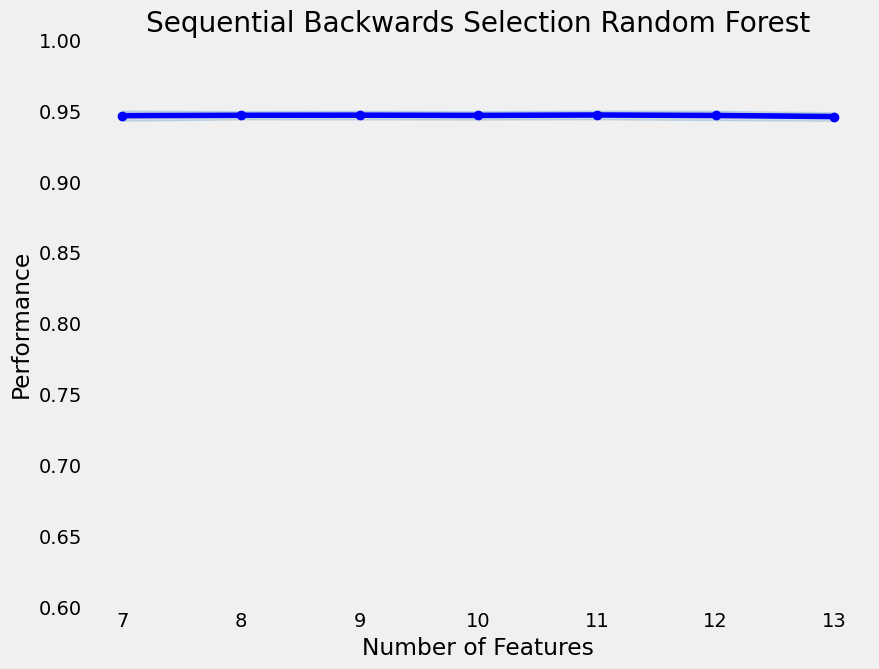

CPU times: total: 18.5 s
Wall time: 3min 47s


In [162]:
%%time
RF = RandomForestRegressor()

#backwards sequential search
sfs = SFS(RF, k_features=7, forward=False, floating=False, scoring="r2", cv=5, n_jobs=-1)

sfs = sfs.fit(x_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(9, 7))

plt.ylim([0.6, 1])
plt.title('Sequential Backwards Selection Random Forest')
plt.grid()
plt.show()

In [163]:
sfs.k_feature_names_

('temp', 'clouds_all', 'HOUR', 'DOW_sin', 'DOW_cos', 'MONTH_sin', 'MONTH_cos')

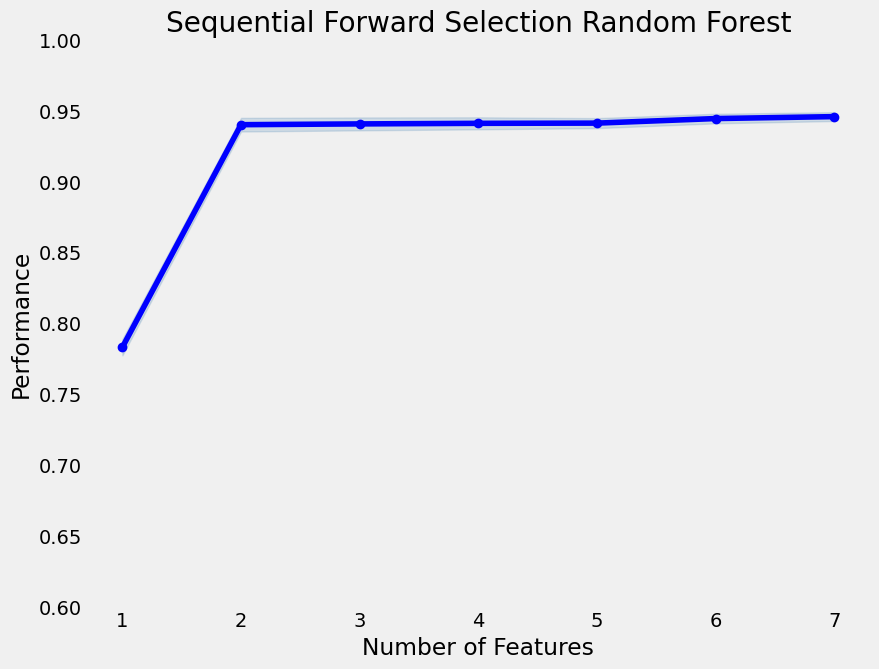

CPU times: total: 328 ms
Wall time: 1min 30s


In [164]:
%%time
RF = RandomForestRegressor()

#backwards sequential search
sfs = SFS(RF, k_features=7, forward=True, floating=False, scoring="r2", cv=5, n_jobs=-1)

sfs = sfs.fit(x_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(9, 7))

plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection Random Forest')
plt.grid()
plt.show()

In [165]:
sfs.k_feature_names_

('rain_1h', 'temp', 'clouds_all', 'HOUR', 'DOW_sin', 'MONTH_sin', 'MONTH_cos')

- chose to use more features for the feature selection of linear regression model because the forward selector did not appear as flat

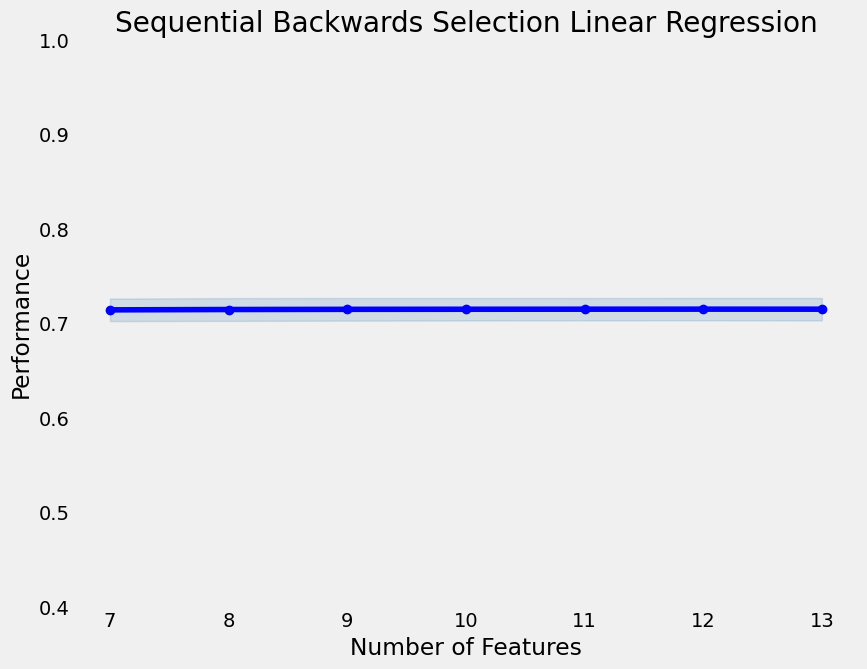

In [166]:
LR = LinearRegression()

#backwards sequential search
sfs = SFS(LR, k_features=7, forward=False, floating=False, scoring="r2", cv=10, n_jobs=-1)

sfs = sfs.fit(x_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(9, 7))

plt.ylim([0.4, 1])
plt.title('Sequential Backwards Selection Linear Regression')
plt.grid()
plt.show()


In [167]:
sfs.k_feature_names_

('temp', 'DOW', 'HOUR', 'DOW_cos', 'MONTH_sin', 'HOUR_sin', 'HOUR_cos')

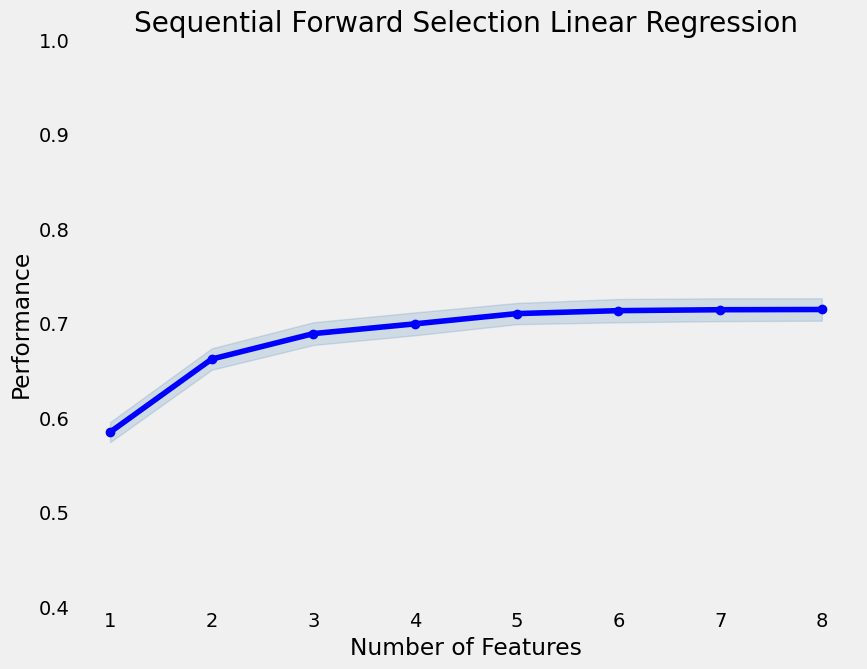

In [168]:
LR = LinearRegression()

#backwards sequential search
sfs = SFS(LR, k_features=8, forward=True, floating=False, scoring="r2", cv=10, n_jobs=-1)

sfs = sfs.fit(x_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(9, 7))

plt.ylim([0.4, 1])
plt.title('Sequential Forward Selection Linear Regression')
plt.grid()
plt.show()


In [169]:
sfs.k_feature_names_

('DOW',
 'HOUR',
 'DOW_sin',
 'DOW_cos',
 'MONTH_sin',
 'MONTH_cos',
 'HOUR_sin',
 'HOUR_cos')

###### Choice of features
- Random Forest
    - there is an advanteage in using sine/cosine date-time seires.
    - Hour appears preferred in non-cylical form.
    - it is beneficial to have more features but there is a risk of over fitting and I can remove redundent information.
    - Temperature does appear to be of value the most from whether data as it was the only one in the op 7 in RFE test.
    - Clouds finished top 9 in RFE test and was similar in coefficent scores to temp without directly correlating much with temp.
    - choices:
        - sine/cosine MONTH
        - sine/cosine DOW
        - HOUR (normal)
        - Temperature
        - Clouds_all
        
        
- Linear Regression
    - sine/cosine date-time is better in day, month and hour.
    - snow was in the top 3 of RFE but was not in the 7 or 8 chosen in sequential feature selection.
    - no weather feature other than snow was in the top 9 of RFE and it is one that is rarely not zero so should not unduly effect predictions too much.
    - no weather feature other than temperature was in recommended in sequential feature selection.
    - temperature, because it could effect traffic speed negatively when hot or cold due to increased number of cars on the road in good weather and increased caution in bad weather may have undue influence.
    - choices:
        - sine/cosine MONTH
        - sine/cosine DOW
        - sine/cosine HOUR
        - snow

In [170]:
x_train.head(3)

,rain_1h,snow_1h,temp,clouds_all,DOW,HOUR,MONTH,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
20747,0.0,0.0,255.42,1,1,2,1,0.781831,0.623490,0.500000,0.866025,0.500000,0.866025
4375,0.0,0.0,275.15,1,5,0,2,-0.974928,-0.222521,0.866025,0.500000,0.000000,1.000000
4281,0.0,0.0,270.30,1,6,4,2,-0.781831,0.623490,0.866025,0.500000,0.866025,0.500000


In [172]:
x_rf = x_train.drop(["rain_1h", "snow_1h", "DOW", "MONTH", "HOUR_sin", "HOUR_cos"], axis=1)
x_test_rf = x_test.drop(["rain_1h", "snow_1h", "DOW", "MONTH", "HOUR_sin", "HOUR_cos"], axis=1)

In [175]:
x_rf.head(3)

,temp,clouds_all,HOUR,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos
20747,255.42,1,2,0.781831,0.623490,0.500000,0.866025
4375,275.15,1,0,-0.974928,-0.222521,0.866025,0.500000
4281,270.30,1,4,-0.781831,0.623490,0.866025,0.500000


In [173]:
x_lr = x_train.drop(["rain_1h", "temp", "DOW", "MONTH", "HOUR", "clouds_all"], axis=1)
x_test_lr = x_test.drop(["rain_1h", "temp", "DOW", "MONTH", "HOUR", "clouds_all"], axis=1)

In [176]:
x_lr.head(3)

,snow_1h,DOW_sin,DOW_cos,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
20747,0.0,0.781831,0.623490,0.500000,0.866025,0.500000,0.866025
4375,0.0,-0.974928,-0.222521,0.866025,0.500000,0.000000,1.000000
4281,0.0,-0.781831,0.623490,0.866025,0.500000,0.866025,0.500000


##### Results
- As was somewhat expected given the results from both feature selection which showed that the addition of more features improved accuracy, there was no improvement through the use of subsets.
- As a small victory, the loss in accuracy was so minimal despite the reduction of feature size that in a situation where computing power and pickle file size were important this would be seen as very successful.
- The subset for random forest improved upon the non-cyclical time series set and was either within a single percentage point or single digit units in each of the measurements.
- The subset in the linear regression model was so close to that of the cyclical time series data that the R2 score shows less than 0.1% difference between the two.
- The subset also vastly exceeds the linear regression cyclical model as was expected given its very poor performance.

In [192]:
RF = RandomForestRegressor()
RF.fit(x_rf, y_train)
rf_preds = RF.predict(x_test_rf)

print("Feature Subset")
print("R2: ", r2_score(y_test,rf_preds))
print("MAE: ",mean_absolute_error(y_test,rf_preds))
print("MSE: ",mean_squared_error(y_test,rf_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds)))


print("\nWith cyclical time data")
print("R2: ", r2_score(y_test,rf_preds2))
print("MAE: ",mean_absolute_error(y_test,rf_preds2))
print("MSE: ",mean_squared_error(y_test,rf_preds2))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds2)))

print("\nWithout cyclical time data")
print("R2: ", r2_score(y_test,rf_preds1))
print("MAE: ",mean_absolute_error(y_test,rf_preds1))
print("MSE: ",mean_squared_error(y_test,rf_preds1))
print("RMSE",np.sqrt(mean_squared_error(y_test,rf_preds1)))

Feature Subset
R2:  0.9406021857657705
MAE:  272.5901758805426
MSE:  234373.39561271237
RMSE 484.1212612690258

With cyclical time data
R2:  0.941508872832281
MAE:  271.21434148333907
MSE:  230795.76688553032
RMSE 480.41208028684116

Without cyclical time data
R2:  0.9401036903674267
MAE:  273.926280614765
MSE:  236340.37134596784
RMSE 486.1485075015327


In [193]:
LR = LinearRegression()
LR.fit(x_lr, y_train)
lr_preds = LR.predict(x_test_lr)

print("Feature Subset")
print("R2: ", r2_score(y_test,lr_preds))
print("MAE: ",mean_absolute_error(y_test,lr_preds))
print("MSE: ",mean_squared_error(y_test,lr_preds))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds)))


print("\nWith cyclical time data")
print("R2: ", r2_score(y_test,lr_preds2))
print("MAE: ",mean_absolute_error(y_test,lr_preds2))
print("MSE: ",mean_squared_error(y_test,lr_preds2))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds2)))


print("\nWithout cyclical time data")
print("R2: ", r2_score(y_test,lr_preds1))
print("MAE: ",mean_absolute_error(y_test,lr_preds1))
print("MSE: ",mean_squared_error(y_test,lr_preds1))
print("RMSE",np.sqrt(mean_squared_error(y_test,lr_preds1)))

Feature Subset
R2:  0.6983750626334864
MAE:  839.9408468714298
MSE:  1190159.2959850521
RMSE 1090.9442222153486

With cyclical time data
R2:  0.6984703151871707
MAE:  839.9672503627523
MSE:  1189783.446052936
RMSE 1090.7719496085954

Without cyclical time data
R2:  0.17207160820011125
MAE:  1590.7236083793348
MSE:  3266860.7593053314
RMSE 1807.4459215438042


## Conclusions
##### - Having cyclical time series data can have value to models both in linear regression and decision tree based models.
##### - There is no guarentee that reducing the number of features used will improve the performance of a model.
##### - Linear Regression Models are not suited to deal with non-cyclically encoded date-time data.
##### - The differnt available methods of feature selection in the MLXTEND and SKLEARN, although useful, are imperfect and can produce contradictory results.
